<a href="https://colab.research.google.com/github/Athira-codes/ml-projects/blob/main/adult_income_census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***ADULT INCOME CENSUS***

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
salary: >50K,<=50K

**IMPORT RELEVENT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

**IMPORT DATASET**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATASETS/adult11.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# **DATA PREPROCESSING AND EDA**

Conducting an exploratory analysis to understand the relationships between different features and the target variable. This can involve visualizations such as histograms, box plots, and correlation matrices.

check for missing values

In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Although the dataset does not contain any null values, a closer look  tells us that there are a lot of '?' values in our dataset. We will have to replace those values

In [ ]:
df.replace('?',np.NaN,inplace=True)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
df['workclass'].unique()

array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df['occupation'].unique()

array([nan, 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [ ]:
df['native.country'].unique()

array(['United-States', nan, 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [ ]:
df['workclass']=df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation']=df['occupation'].fillna(df['occupation'].mode()[0])
df['native.country']=df['native.country'].fillna(df['native.country'].mode()[0])
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
cat_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)

cat_col

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

<Figure size 640x480 with 0 Axes>

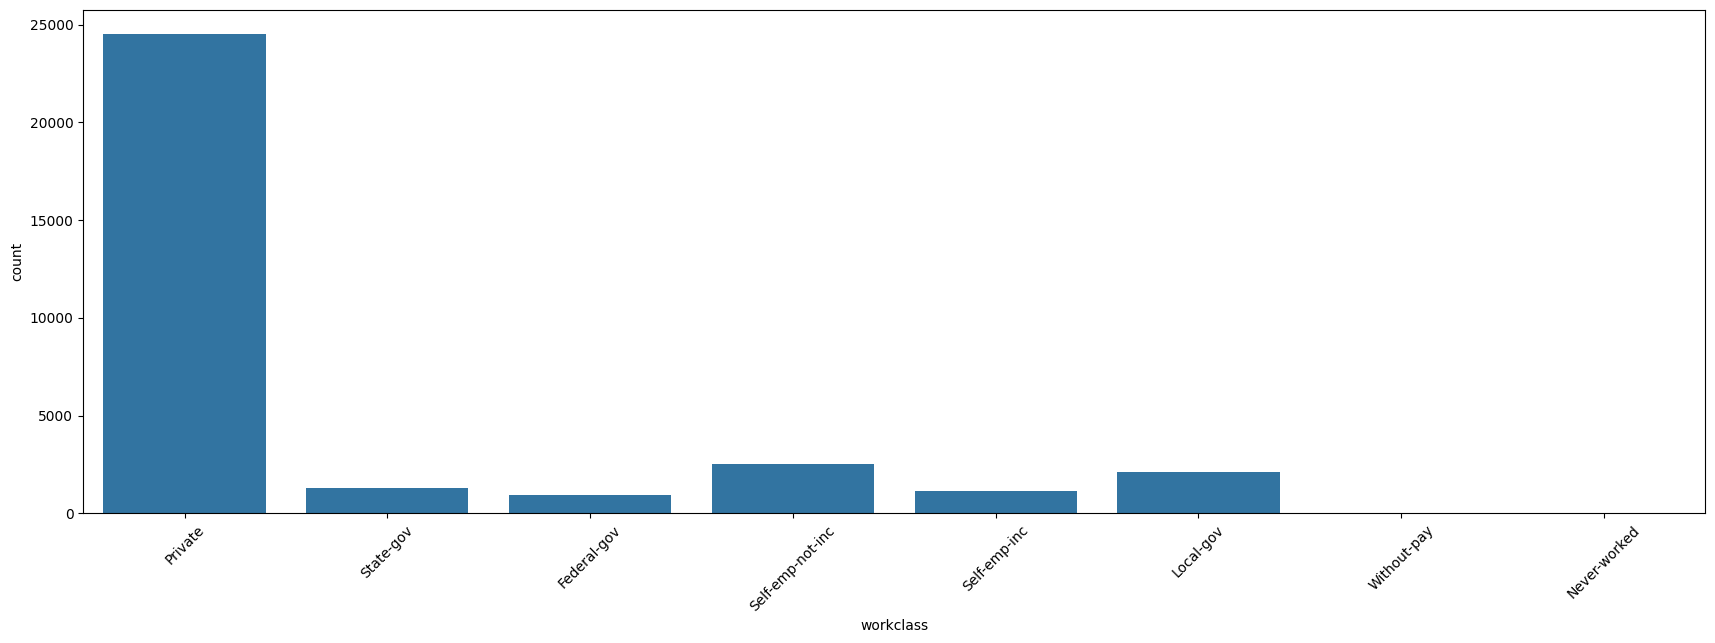

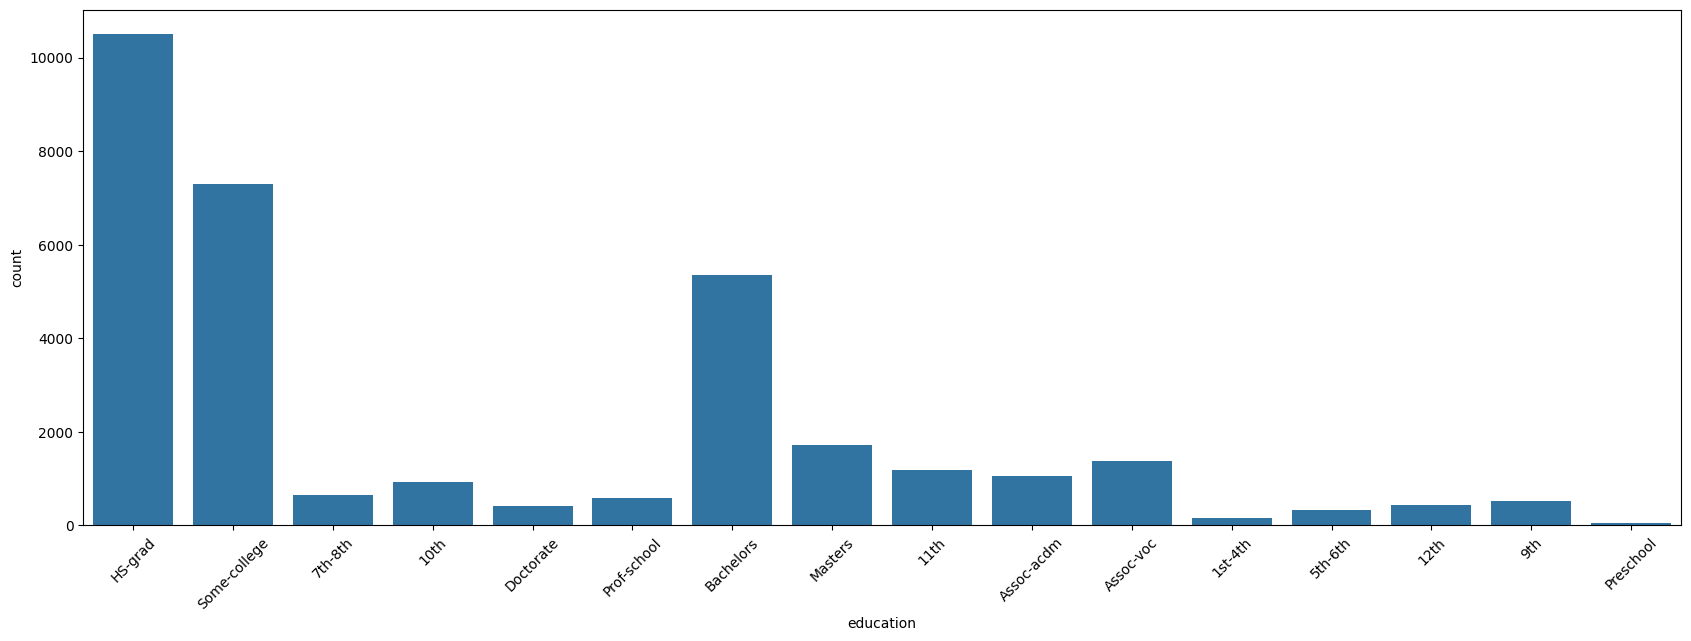

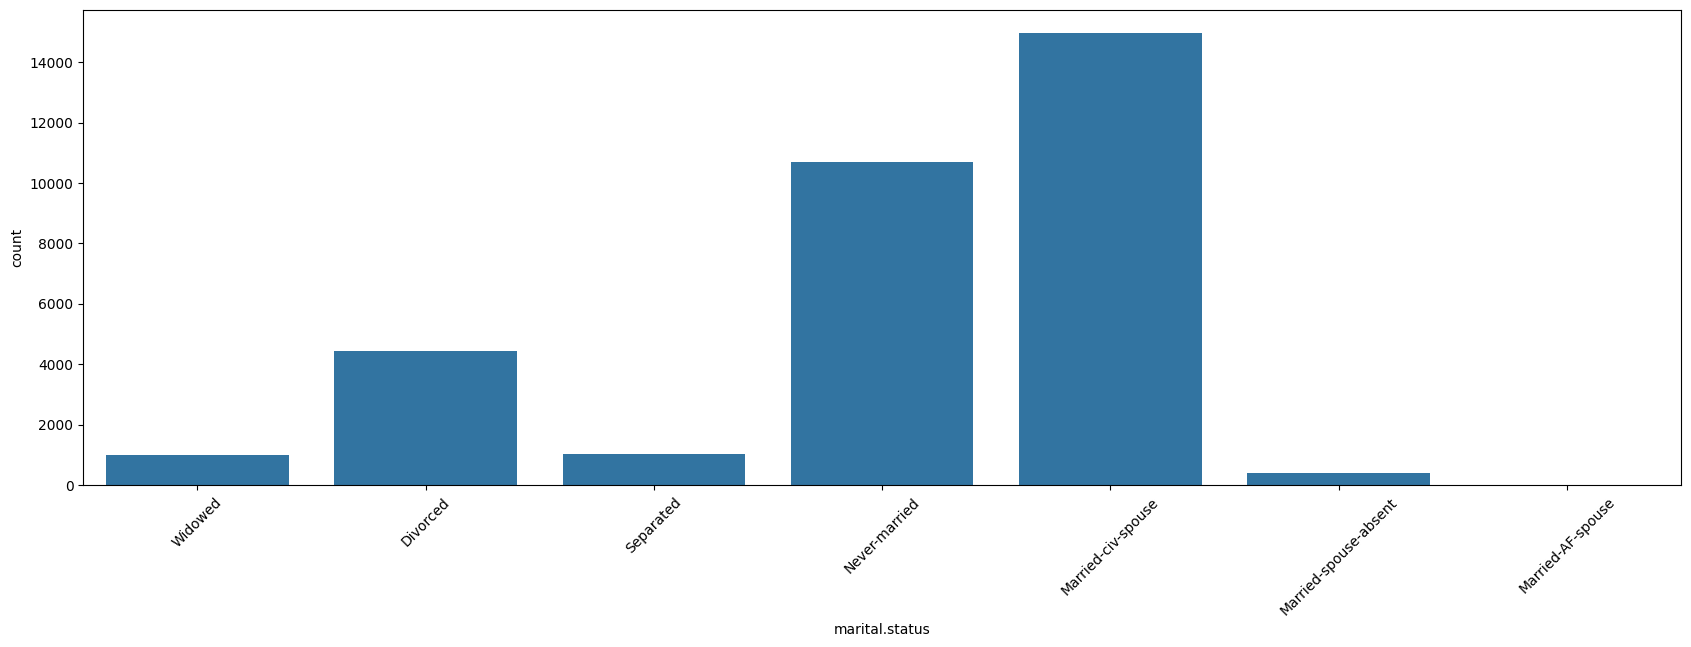

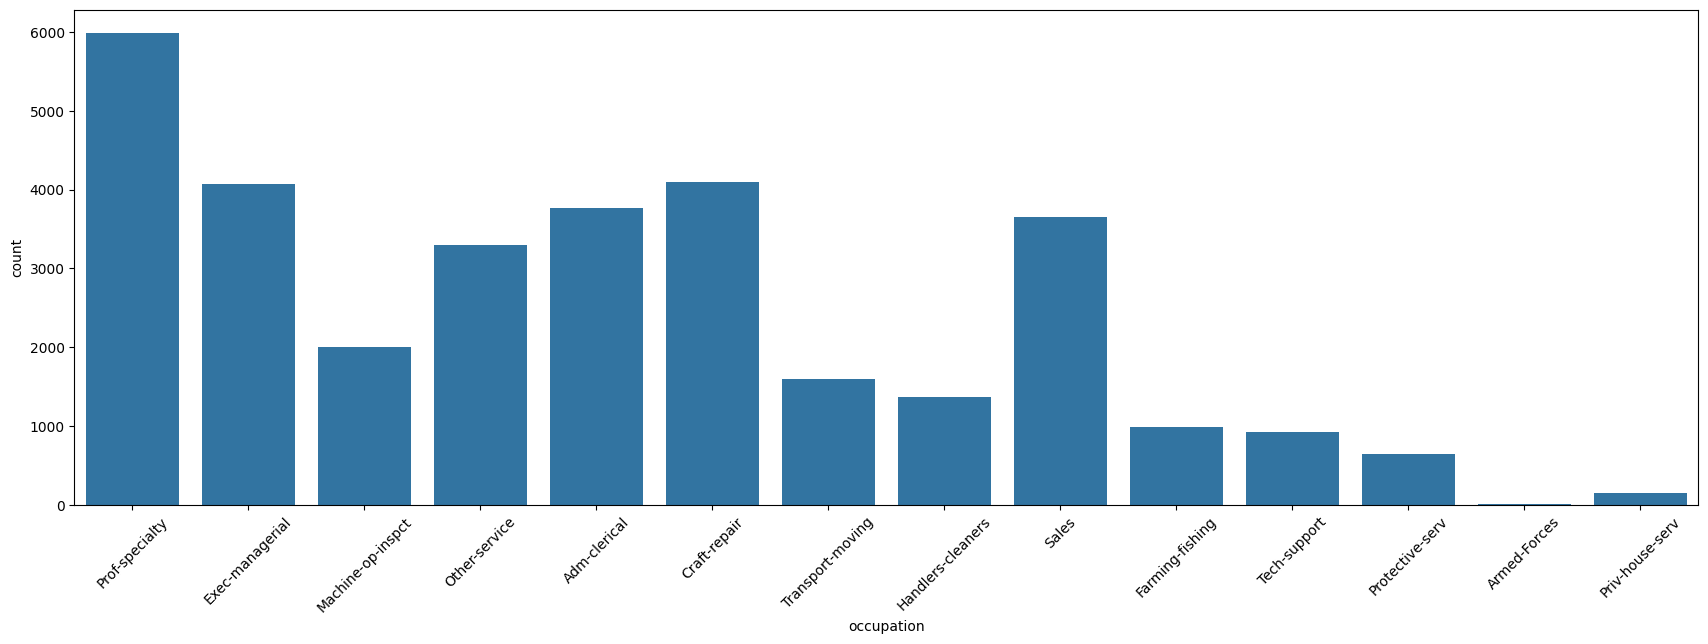

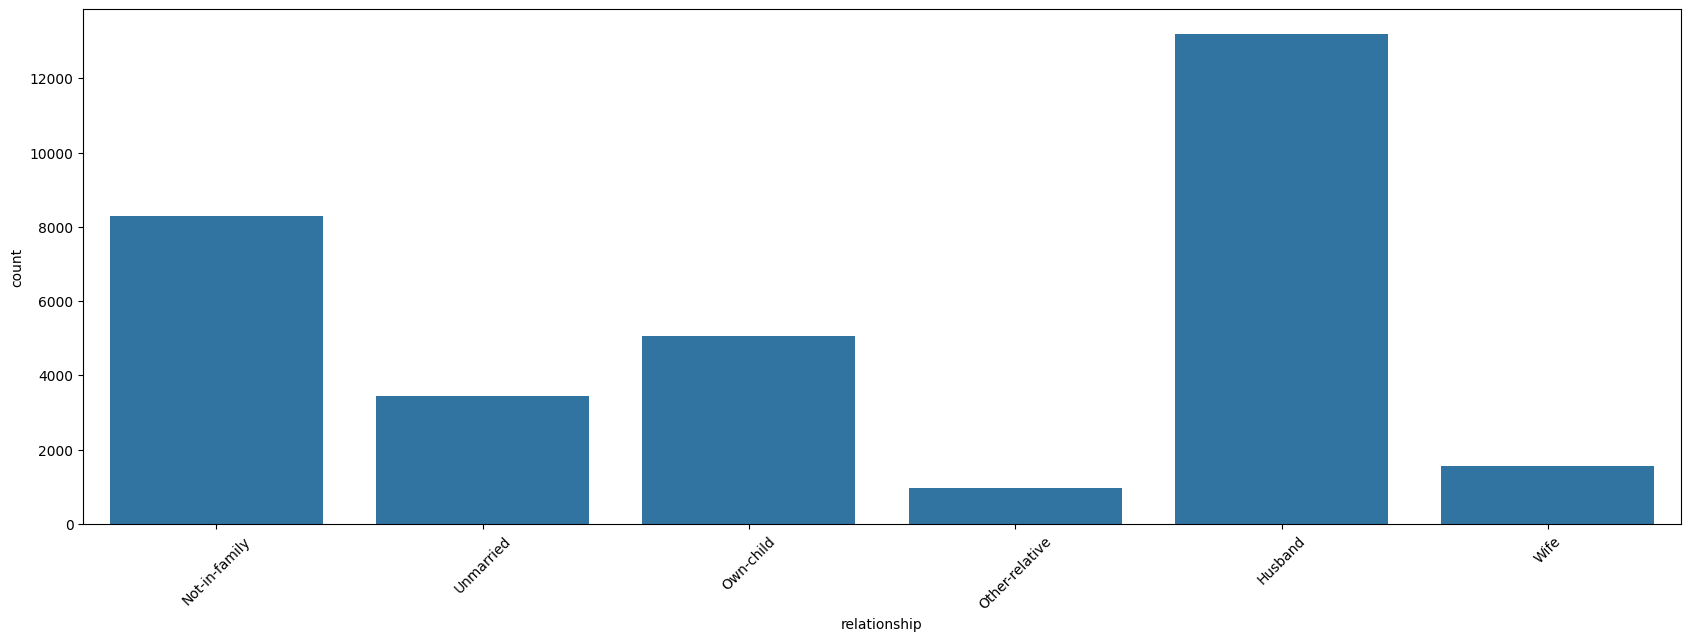

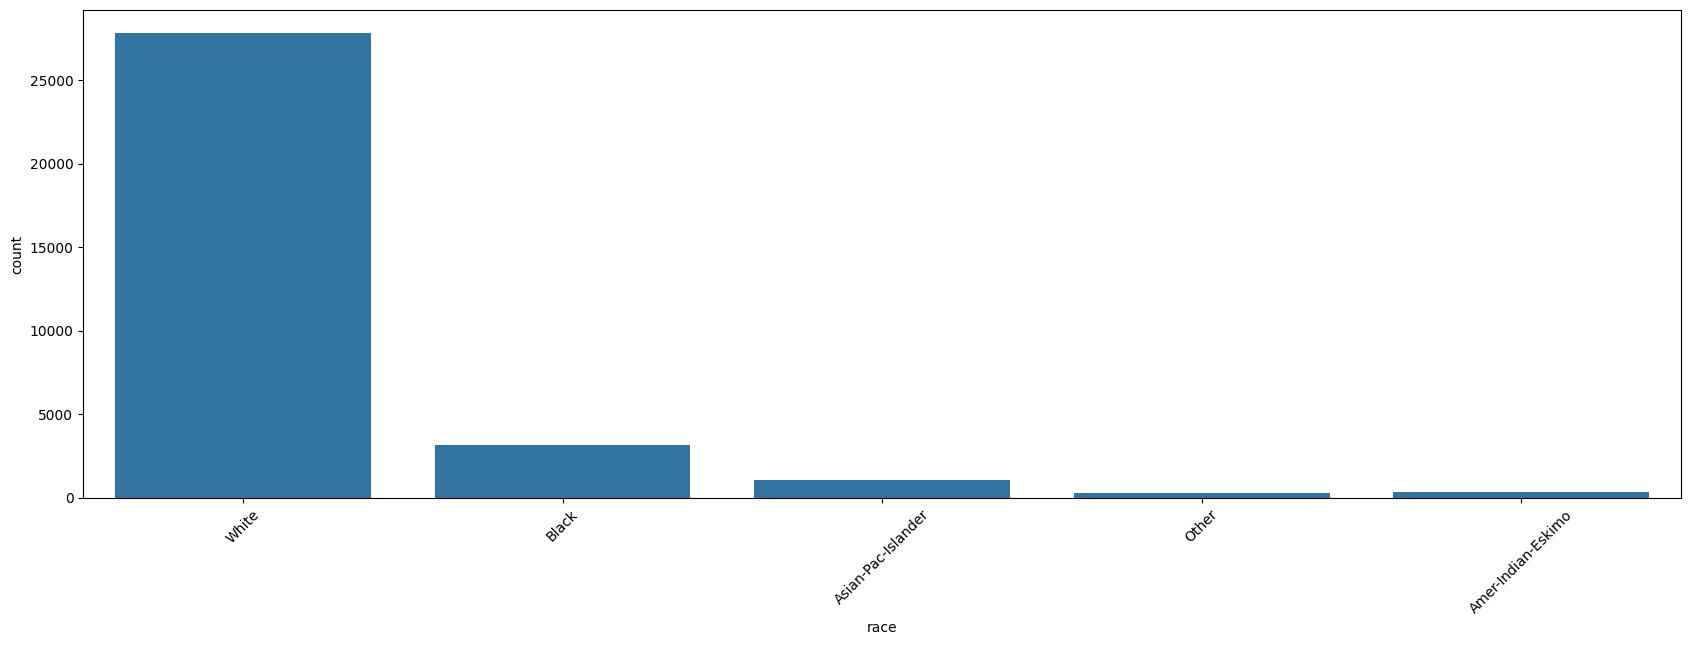

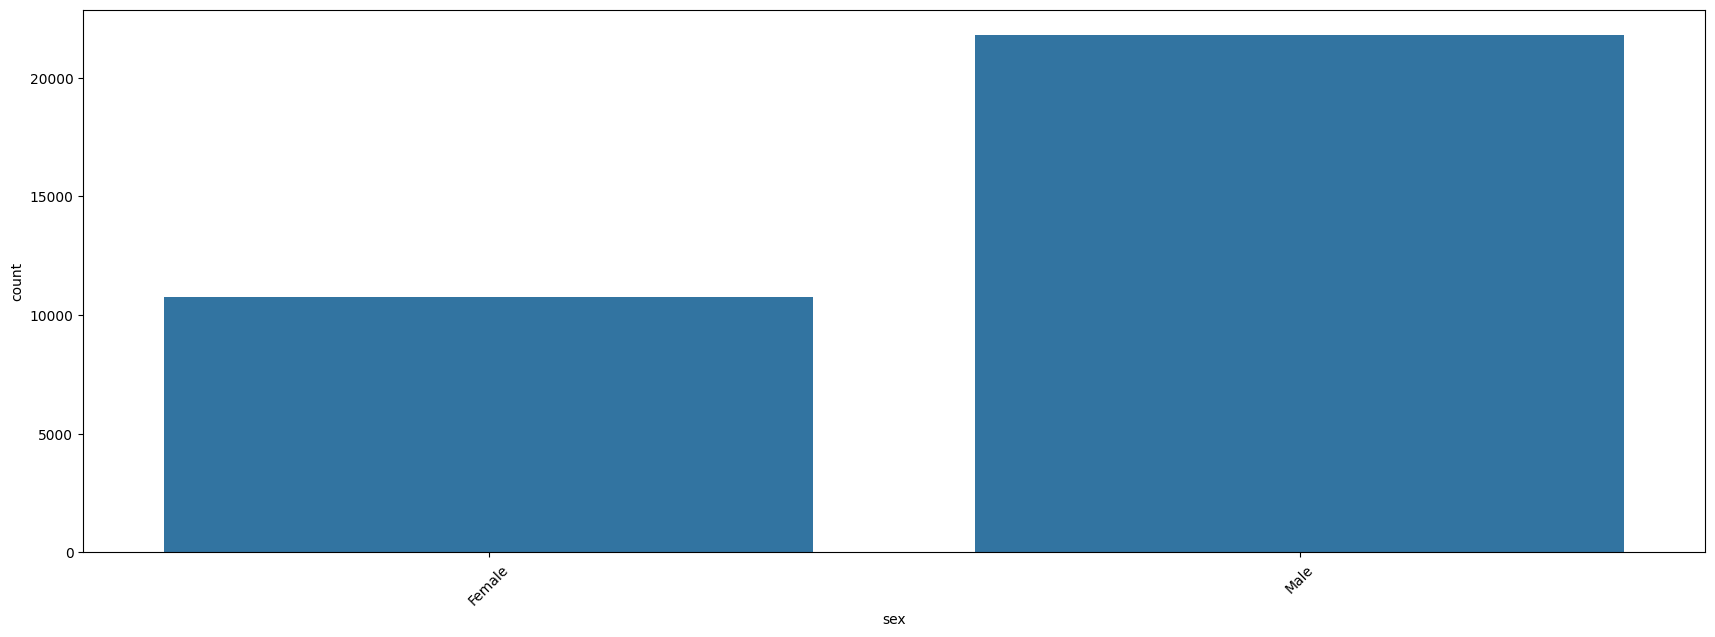

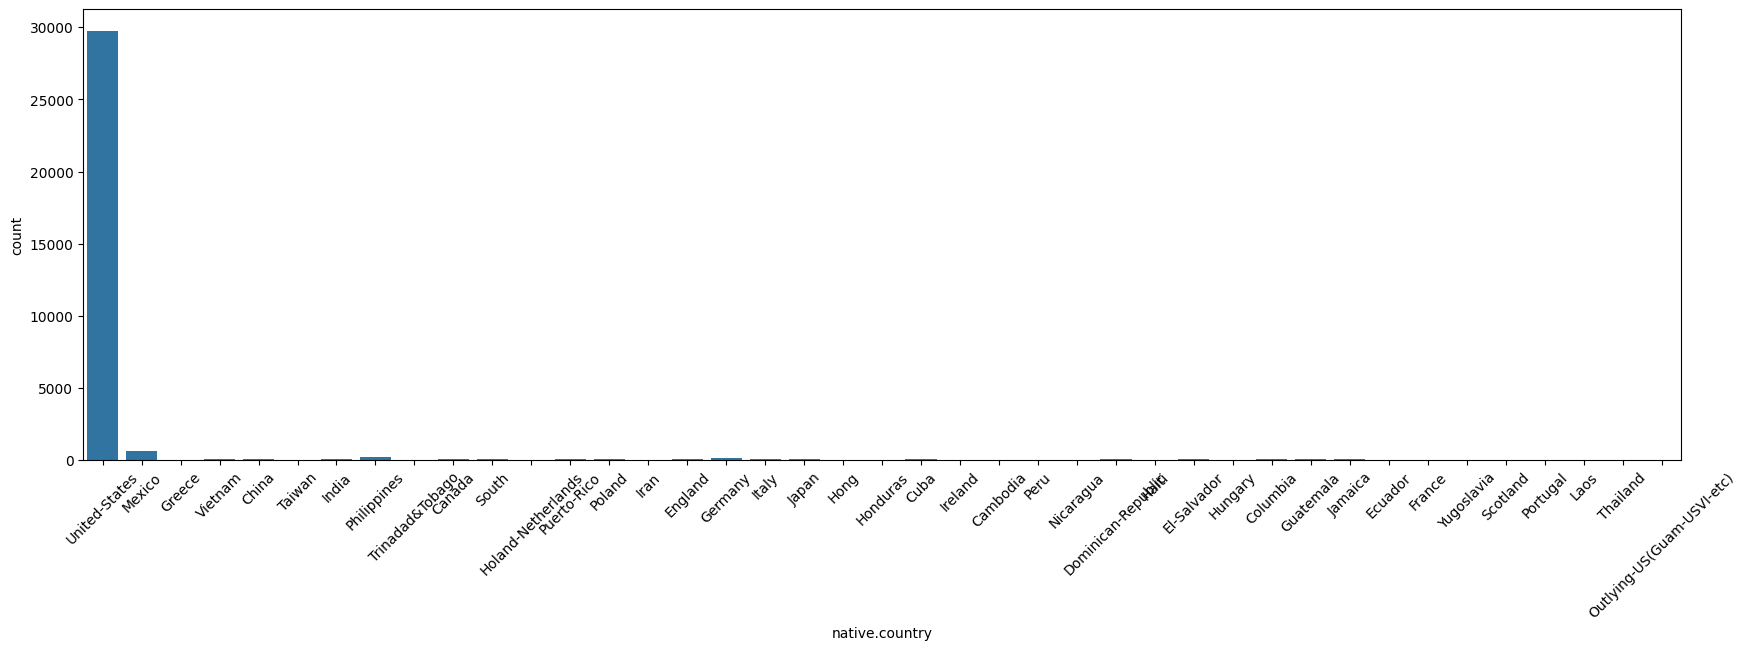

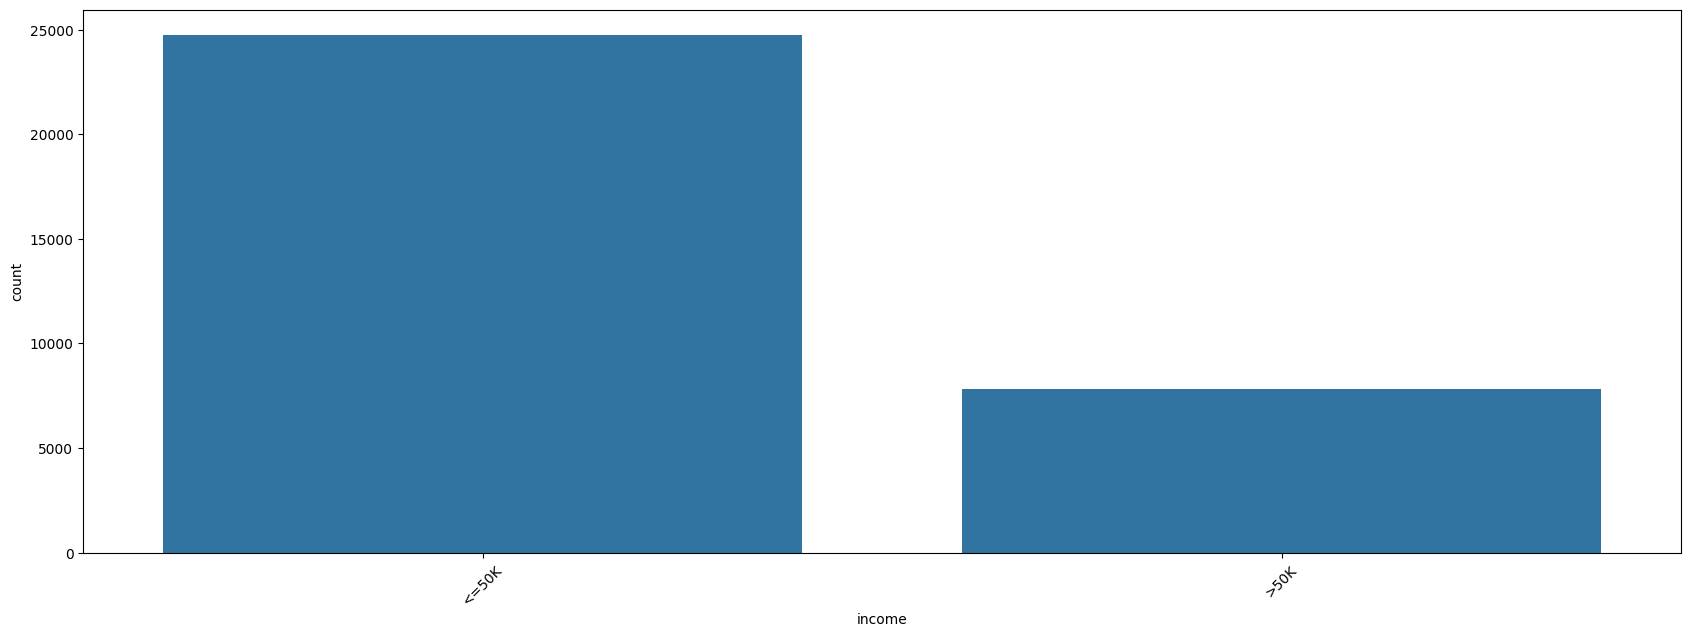

In [ ]:
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_col)):
    plt.figure(figsize=(50, 50))
    plt.subplot(8, 3, i+1)
    sns.countplot(x=df[cat_col[i]])
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [ ]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

label encoding

In [ ]:

le=LabelEncoder()
df['workclass']=le.fit_transform(df['workclass'])
df['education']=le.fit_transform(df['education'])
df['marital.status']=le.fit_transform(df['marital.status'])
df['occupation']=le.fit_transform(df['occupation'])
df['relationship']=le.fit_transform(df['relationship'])
df['race']=le.fit_transform(df['race'])
df['sex']=le.fit_transform(df['sex'])
df['native.country']=le.fit_transform(df['native.country'])
df['income']=le.fit_transform(df['income'])
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,310152,15,10,4,10,1,4,1,0,0,40,38,0
32557,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32558,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32559,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0


data splitting

In [ ]:
X=df.iloc[:,:-1]
X

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,310152,15,10,4,10,1,4,1,0,0,40,38
32557,27,3,257302,7,12,2,12,5,4,0,0,0,38,38
32558,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
32559,58,3,151910,11,9,6,0,4,4,0,0,0,40,38


In [ ]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

scaling using minmax scaler

In [ ]:
mms=MinMaxScaler()
new_x=mms.fit_transform(X)
new_x

array([[1.        , 0.42857143, 0.04398745, ..., 1.        , 0.39795918,
        0.95      ],
       [0.89041096, 0.42857143, 0.08189579, ..., 1.        , 0.17346939,
        0.95      ],
       [0.67123288, 0.42857143, 0.11802067, ..., 1.        , 0.39795918,
        0.95      ],
       ...,
       [0.31506849, 0.42857143, 0.09650032, ..., 0.        , 0.39795918,
        0.95      ],
       [0.56164384, 0.42857143, 0.09482688, ..., 0.        , 0.39795918,
        0.95      ],
       [0.06849315, 0.42857143, 0.12849934, ..., 0.        , 0.19387755,
        0.95      ]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(new_x,y,test_size=0.3,random_state=3)

# MODEL CREATION WITH DIFFERENT ALGORITHMS

KNeighborsClassifier(n_neighbors=7)
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7437
           1       0.66      0.57      0.61      2332

    accuracy                           0.83      9769
   macro avg       0.77      0.74      0.75      9769
weighted avg       0.82      0.83      0.82      9769



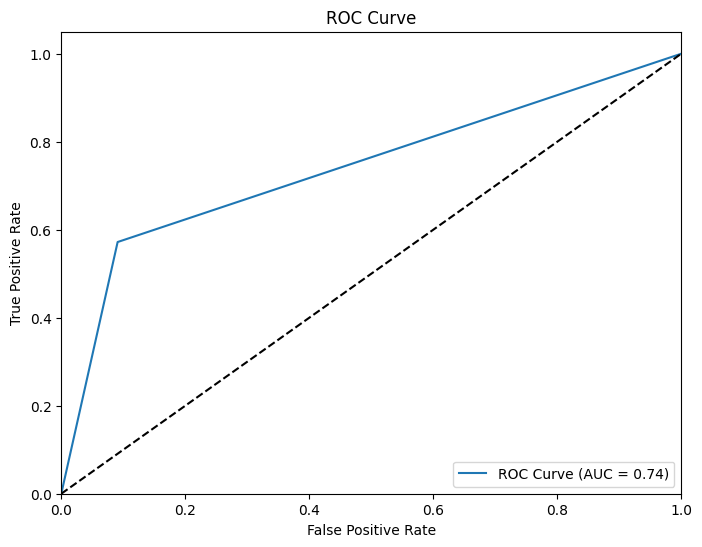

LogisticRegression(random_state=1)
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7437
           1       0.73      0.44      0.55      2332

    accuracy                           0.83      9769
   macro avg       0.79      0.70      0.72      9769
weighted avg       0.82      0.83      0.81      9769



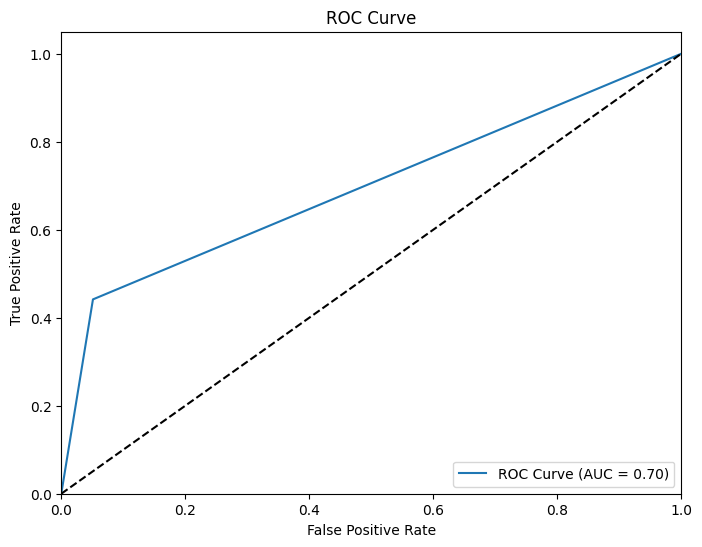

SVC()
              precision    recall  f1-score   support

           0       0.87      0.95      0.90      7437
           1       0.75      0.53      0.62      2332

    accuracy                           0.85      9769
   macro avg       0.81      0.74      0.76      9769
weighted avg       0.84      0.85      0.84      9769



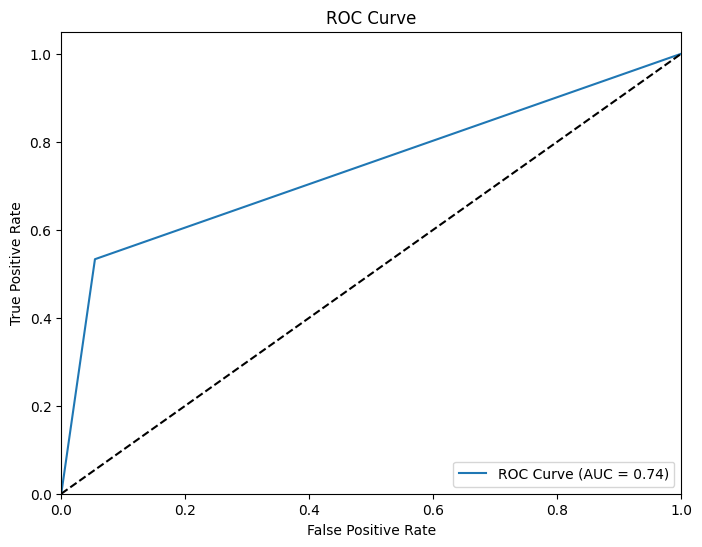

GaussianNB()
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      7437
           1       0.70      0.36      0.48      2332

    accuracy                           0.81      9769
   macro avg       0.76      0.66      0.68      9769
weighted avg       0.80      0.81      0.79      9769



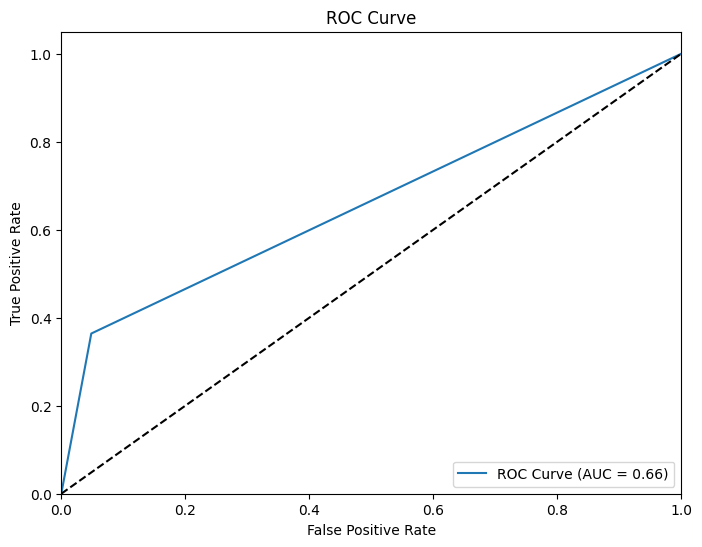

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=5)
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7437
           1       0.76      0.53      0.62      2332

    accuracy                           0.85      9769
   macro avg       0.81      0.74      0.76      9769
weighted avg       0.84      0.85      0.84      9769



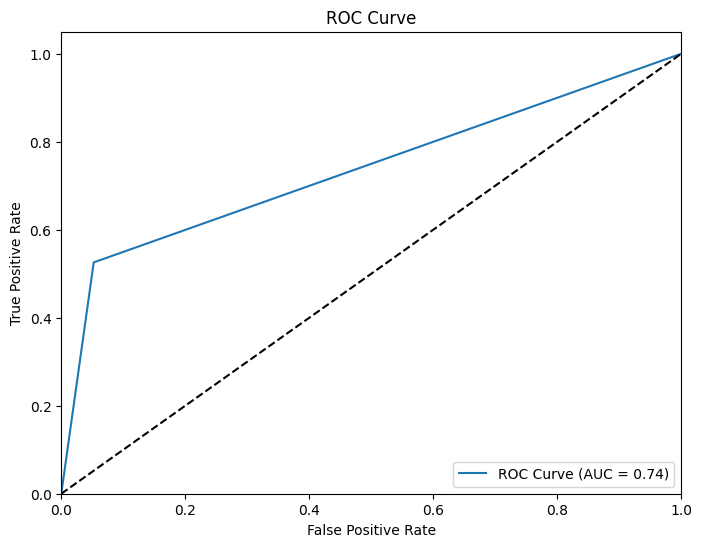

RandomForestClassifier(criterion='entropy', max_depth=4)
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7437
           1       0.80      0.47      0.59      2332

    accuracy                           0.84      9769
   macro avg       0.83      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



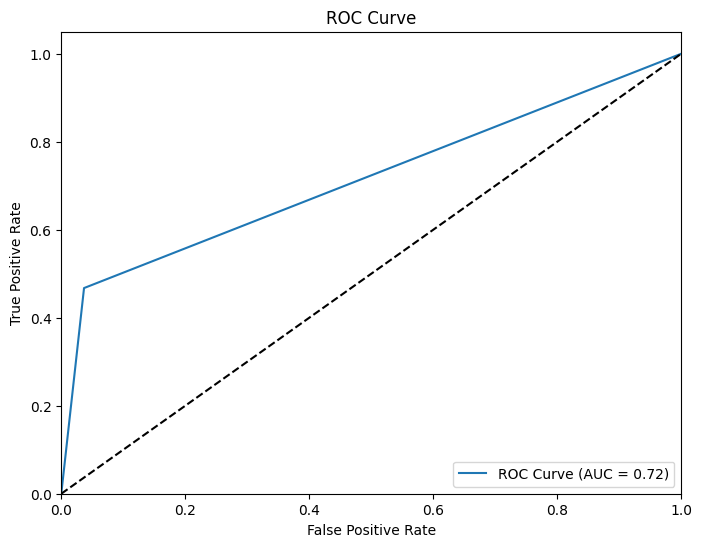

AdaBoostClassifier(random_state=1)
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7437
           1       0.77      0.61      0.68      2332

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



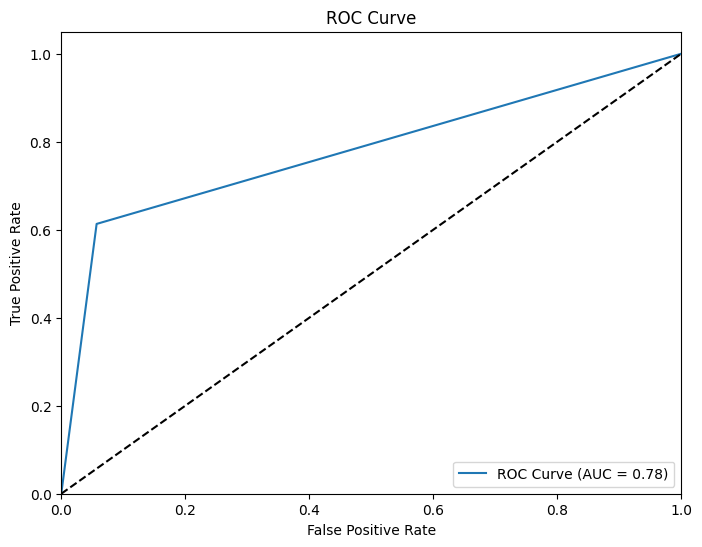

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      7437
           1       0.76      0.65      0.70      2332

    accuracy                           0.87      9769
   macro avg       0.83    

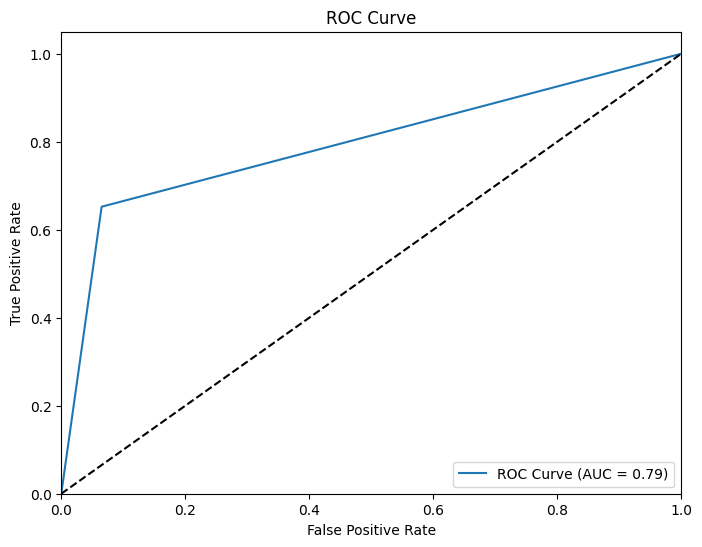

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
lr=LogisticRegression(random_state=1)
sv=SVC()
nb=GaussianNB()
clf=DecisionTreeClassifier(random_state=5,criterion='entropy',max_depth=4)
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=4)
ad=AdaBoostClassifier(random_state=1)
xgb=XGBClassifier(random_state=1)
models=[knn,lr,sv,nb,clf,rf,ad,xgb]
for model in models:
   print(model)
   model.fit(X_train,y_train)
   y_pred=model.predict(X_test)
   print(classification_report(y_test,y_pred))
   fpr, tpr, _ = roc_curve(y_test, y_pred)
   roc_auc = roc_auc_score(y_test, y_pred)
  #  Plot ROC curve
   plt.figure(figsize=(8, 6))
   plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
   plt.plot([0, 1], [0, 1], 'k--')
   plt.xlim([0.0, 1.0])
   plt.ylim([0.0, 1.05])
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title('ROC Curve')
   plt.legend(loc='lower right')
   plt.show()


highest accuracy is 87 in xgb classifier

# **FEATURE SELECTION**

transforming the features for better prediction

In [ ]:
df.corr()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
age,1.000000,0.040504,-0.076646,-0.010508,0.036527,-0.266288,0.001739,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000270,0.234037
workclass,0.040504,1.000000,-0.024338,0.004874,0.003536,-0.020468,0.007110,-0.057947,0.048350,0.071584,0.031505,0.002644,0.042199,-0.001625,0.002693
fnlwgt,-0.076646,-0.024338,1.000000,-0.028145,-0.043195,0.028153,0.000188,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.063286,-0.009463
education,-0.010508,0.004874,-0.028145,1.000000,0.359153,-0.038407,-0.041279,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.076060,0.079317
education.num,0.036527,0.003536,-0.043195,0.359153,1.000000,-0.069304,0.070954,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.088894,0.335154
marital.status,-0.266288,-0.020468,0.028153,-0.038407,-0.069304,1.000000,0.034962,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.021278,-0.199307
occupation,0.001739,0.007110,0.000188,-0.041279,0.070954,0.034962,1.000000,-0.037451,-0.004839,0.047461,0.018021,0.009680,-0.012879,-0.002217,0.034625
relationship,-0.263698,-0.057947,0.008931,-0.010876,-0.094153,0.185451,-0.037451,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.010712,-0.250918
race,0.028718,0.048350,-0.021291,0.014131,0.031838,-0.068013,-0.004839,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.116529,0.071846
sex,0.088832,0.071584,0.026858,-0.027356,0.012280,-0.129314,0.047461,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,0.002061,0.215980


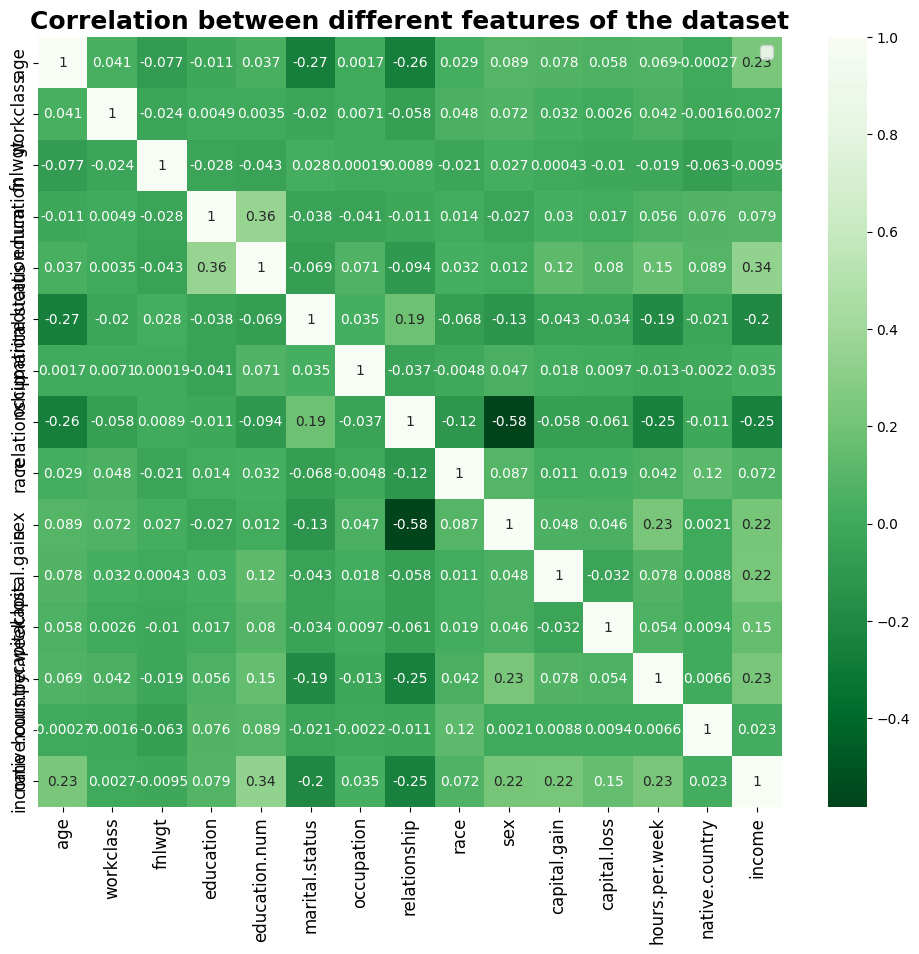

In [ ]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

In [ ]:
X=X.drop(['workclass','fnlwgt','education','occupation','race','native.country'],axis=1)
X

,age,education.num,marital.status,relationship,sex,capital.gain,capital.loss,hours.per.week
0,90,9,6,1,0,0,4356,40
1,82,9,6,1,0,0,4356,18
2,66,10,6,4,0,0,4356,40
3,54,4,0,4,0,0,3900,40
4,41,10,5,3,0,0,3900,40
...,...,...,...,...,...,...,...,...
32556,22,10,4,1,1,0,0,40
32557,27,12,2,5,0,0,0,38
32558,40,9,2,0,1,0,0,40
32559,58,9,6,4,0,0,0,40


In [ ]:
X_scaled=mms.fit_transform(X)
X_scaled

array([[1.        , 0.53333333, 1.        , ..., 0.        , 1.        ,
        0.39795918],
       [0.89041096, 0.53333333, 1.        , ..., 0.        , 1.        ,
        0.17346939],
       [0.67123288, 0.6       , 1.        , ..., 0.        , 1.        ,
        0.39795918],
       ...,
       [0.31506849, 0.53333333, 0.33333333, ..., 0.        , 0.        ,
        0.39795918],
       [0.56164384, 0.53333333, 1.        , ..., 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.53333333, 0.66666667, ..., 0.        , 0.        ,
        0.19387755]])

In [ ]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

KNeighborsClassifier(n_neighbors=7)
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7368
           1       0.72      0.58      0.64      2401

    accuracy                           0.84      9769
   macro avg       0.79      0.75      0.77      9769
weighted avg       0.83      0.84      0.83      9769



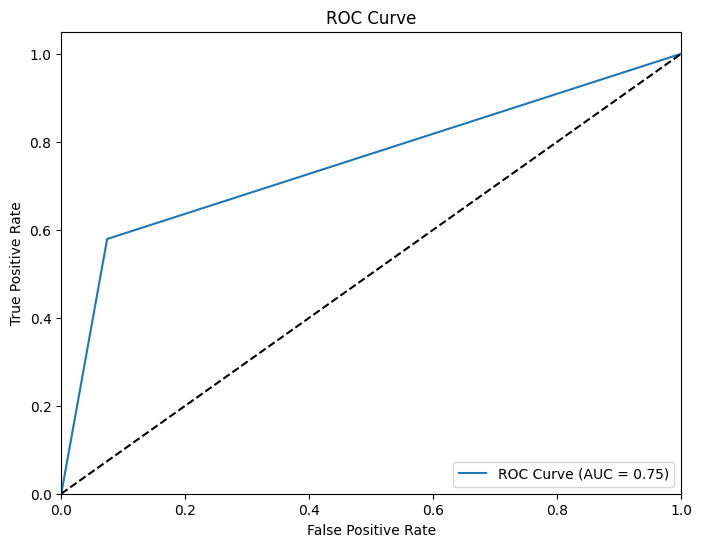

LogisticRegression(random_state=1)
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7368
           1       0.74      0.45      0.56      2401

    accuracy                           0.82      9769
   macro avg       0.79      0.70      0.72      9769
weighted avg       0.81      0.82      0.81      9769



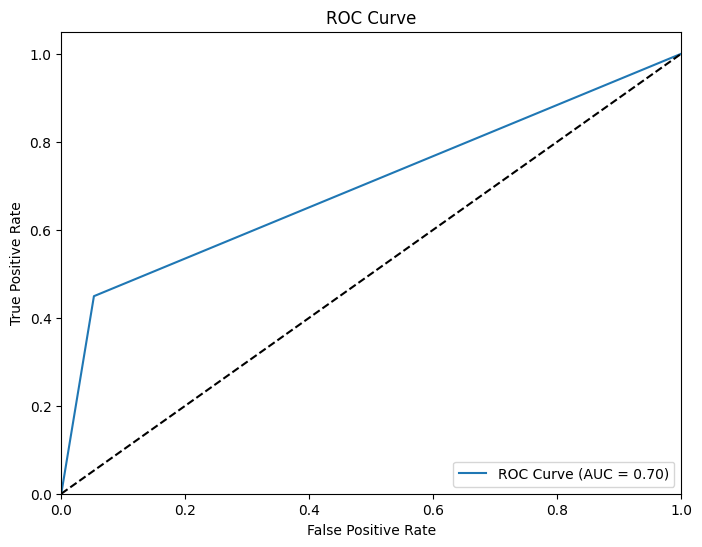

SVC()
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7368
           1       0.78      0.55      0.64      2401

    accuracy                           0.85      9769
   macro avg       0.82      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769



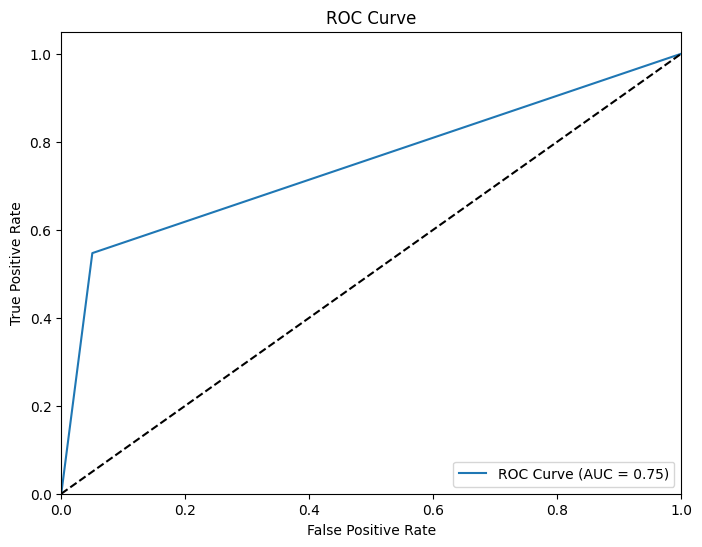

GaussianNB()
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7368
           1       0.71      0.34      0.46      2401

    accuracy                           0.80      9769
   macro avg       0.76      0.65      0.67      9769
weighted avg       0.79      0.80      0.78      9769



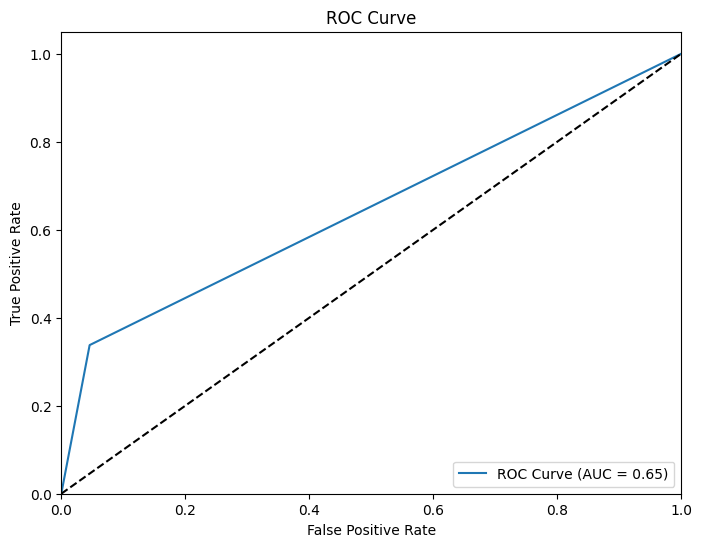

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=5)
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      7368
           1       0.78      0.54      0.64      2401

    accuracy                           0.85      9769
   macro avg       0.82      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769



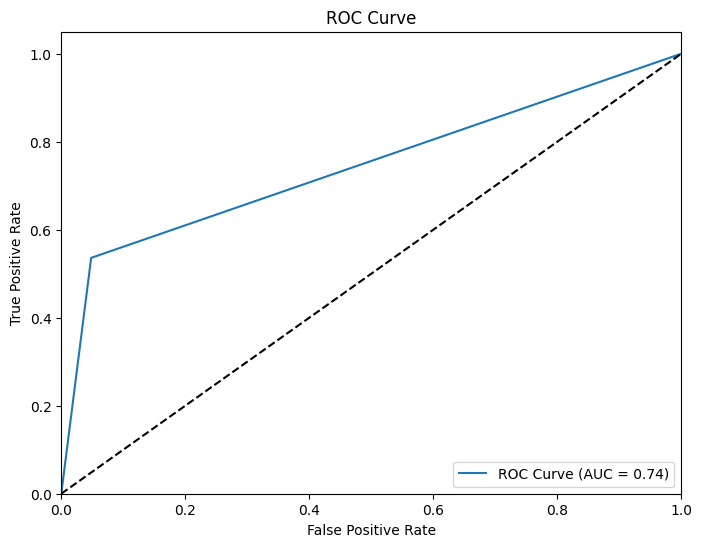

RandomForestClassifier(criterion='entropy', max_depth=4)
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      7368
           1       0.83      0.48      0.61      2401

    accuracy                           0.85      9769
   macro avg       0.84      0.72      0.76      9769
weighted avg       0.85      0.85      0.83      9769



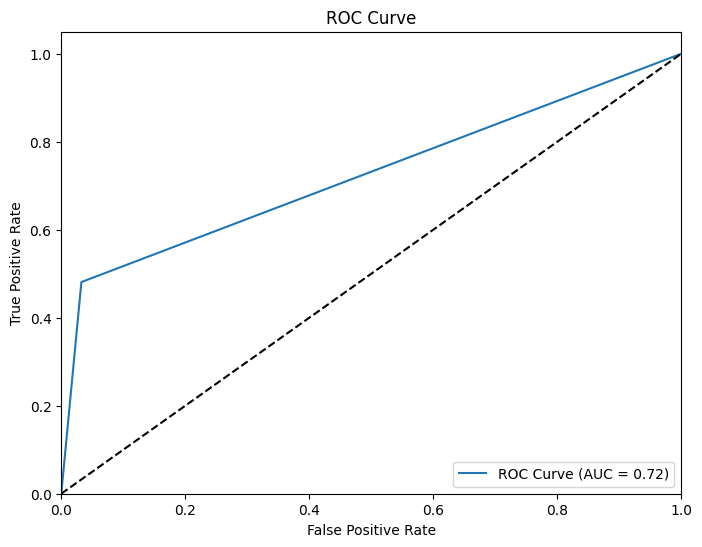

AdaBoostClassifier(random_state=1)
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7368
           1       0.80      0.59      0.68      2401

    accuracy                           0.86      9769
   macro avg       0.84      0.77      0.79      9769
weighted avg       0.86      0.86      0.85      9769



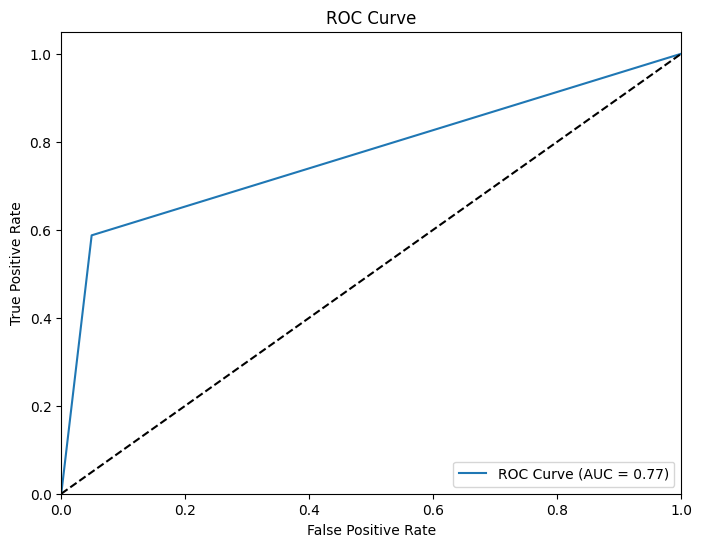

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7368
           1       0.79      0.64      0.71      2401

    accuracy                           0.87      9769
   macro avg       0.84    

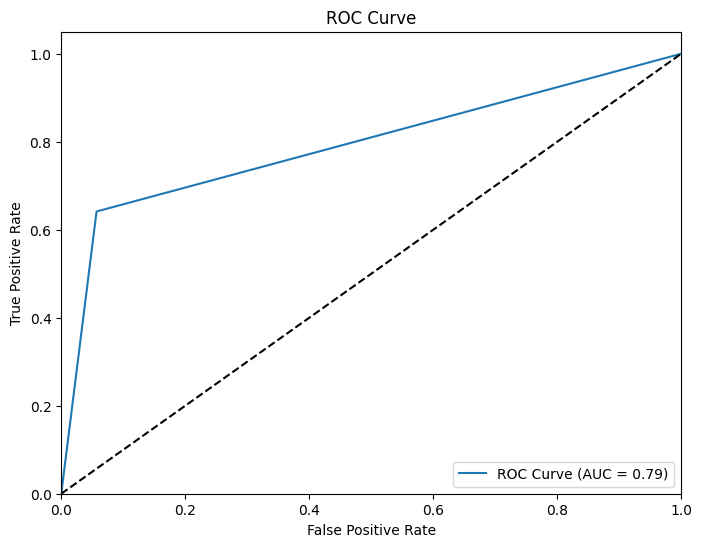

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
lr=LogisticRegression(random_state=1)
sv=SVC()
nb=GaussianNB()
clf=DecisionTreeClassifier(random_state=5,criterion='entropy',max_depth=4)
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=4)
ad=AdaBoostClassifier(random_state=1)
xgb=XGBClassifier(random_state=1)
models=[knn,lr,sv,nb,clf,rf,ad,xgb]
for model in models:
   print(model)
   model.fit(X_train_new,y_train_new)
   y_pred_new=model.predict(X_test_new)
   print(classification_report(y_test_new,y_pred_new))
   fpr, tpr, _ = roc_curve(y_test_new, y_pred_new)
   roc_auc = roc_auc_score(y_test_new, y_pred_new)
   fpr, tpr, _ = roc_curve(y_test_new, y_pred_new)
   roc_auc = roc_auc_score(y_test_new, y_pred_new)
   plt.figure(figsize=(8, 6))
   plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
   plt.plot([0, 1], [0, 1], 'k--')
   plt.xlim([0.0, 1.0])
   plt.ylim([0.0, 1.05])
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title('ROC Curve')
   plt.legend(loc='lower right')
   plt.show()

highest accuracy 87 in xgb

# imbalanced data handling using over sampling and under sampling

oversampling

In [ ]:

from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

In [ ]:
X_os

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49435,38,3,86551,10,9,1,7,0,4,1,0,0,40,38
49436,42,1,213021,11,13,3,8,0,4,0,0,0,40,38
49437,51,0,339881,14,10,2,3,0,4,1,0,0,41,38
49438,40,3,233146,13,9,2,4,0,3,1,0,0,40,38


In [ ]:
y_os

0        0
1        0
2        0
3        0
4        0
        ..
49435    1
49436    1
49437    1
49438    1
49439    1
Name: income, Length: 49440, dtype: int64

In [ ]:
y_os.value_counts()

0    24720
1    24720
Name: income, dtype: int64

In [ ]:
X_os_scaled=mms.fit_transform(X_os)
X_os_scaled

array([[1.        , 0.42857143, 0.04398745, ..., 1.        , 0.39795918,
        0.95      ],
       [0.89041096, 0.42857143, 0.08189579, ..., 1.        , 0.17346939,
        0.95      ],
       [0.67123288, 0.42857143, 0.11802067, ..., 1.        , 0.39795918,
        0.95      ],
       ...,
       [0.46575342, 0.        , 0.22248815, ..., 0.        , 0.40816327,
        0.95      ],
       [0.31506849, 0.42857143, 0.14999864, ..., 0.        , 0.39795918,
        0.95      ],
       [0.20547945, 0.42857143, 0.13394548, ..., 0.        , 0.5       ,
        0.95      ]])

In [ ]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os_scaled,y_os,random_state=1,test_size=0.3)

KNeighborsClassifier(n_neighbors=7)
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7485
           1       0.85      0.86      0.85      7347

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832



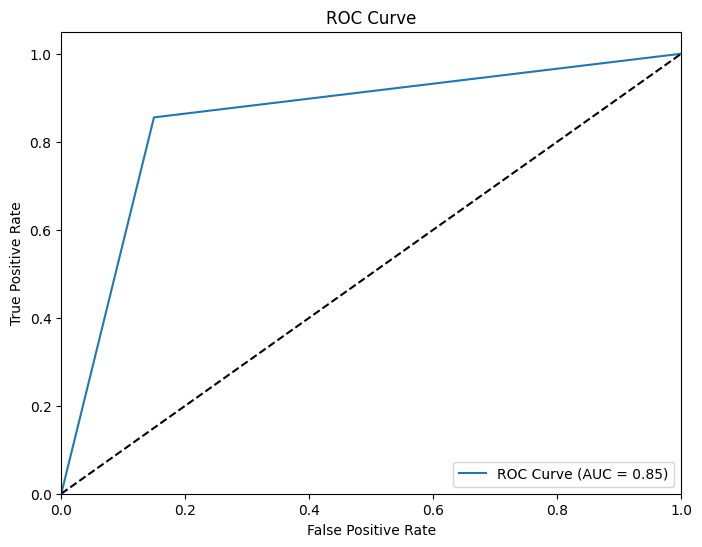

LogisticRegression(random_state=1)
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      7485
           1       0.76      0.79      0.78      7347

    accuracy                           0.77     14832
   macro avg       0.77      0.77      0.77     14832
weighted avg       0.77      0.77      0.77     14832



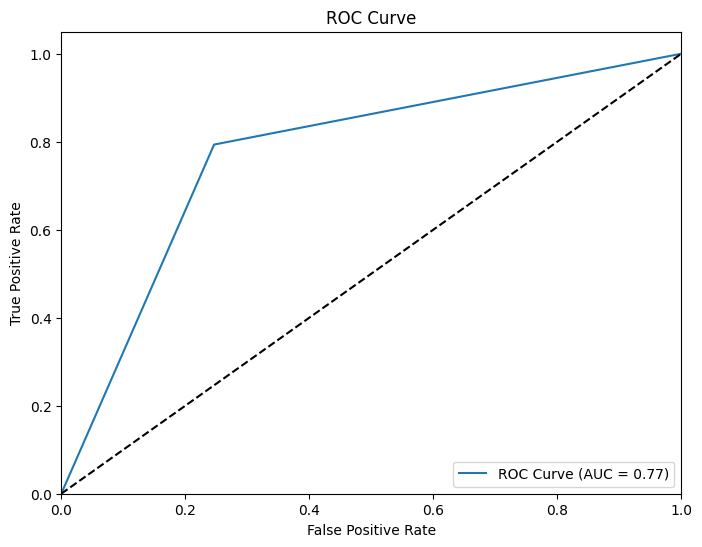

SVC()
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      7485
           1       0.82      0.89      0.85      7347

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832



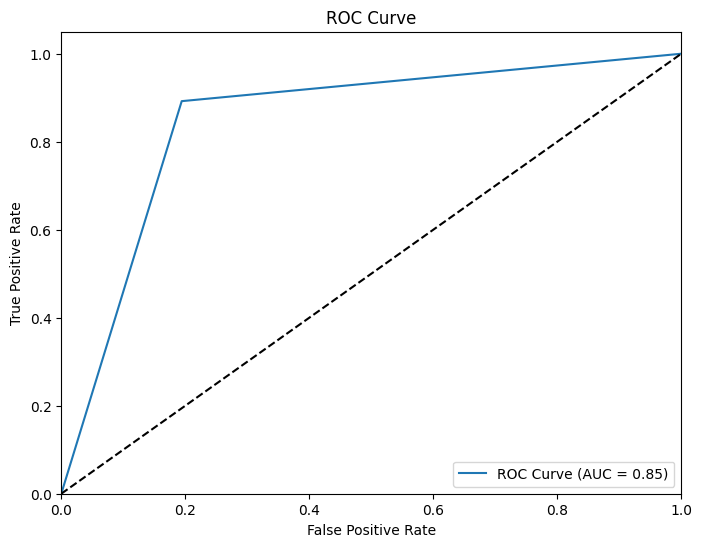

GaussianNB()
              precision    recall  f1-score   support

           0       0.67      0.92      0.78      7485
           1       0.87      0.54      0.67      7347

    accuracy                           0.73     14832
   macro avg       0.77      0.73      0.72     14832
weighted avg       0.77      0.73      0.72     14832



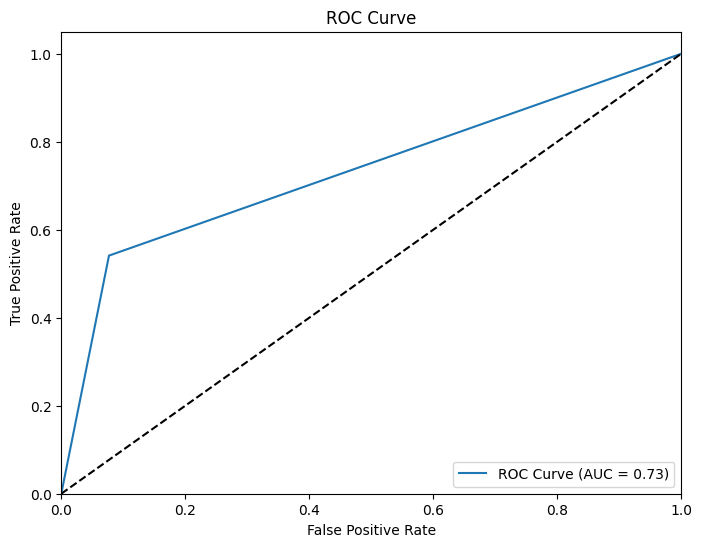

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=5)
              precision    recall  f1-score   support

           0       0.91      0.66      0.76      7485
           1       0.73      0.94      0.82      7347

    accuracy                           0.79     14832
   macro avg       0.82      0.80      0.79     14832
weighted avg       0.82      0.79      0.79     14832



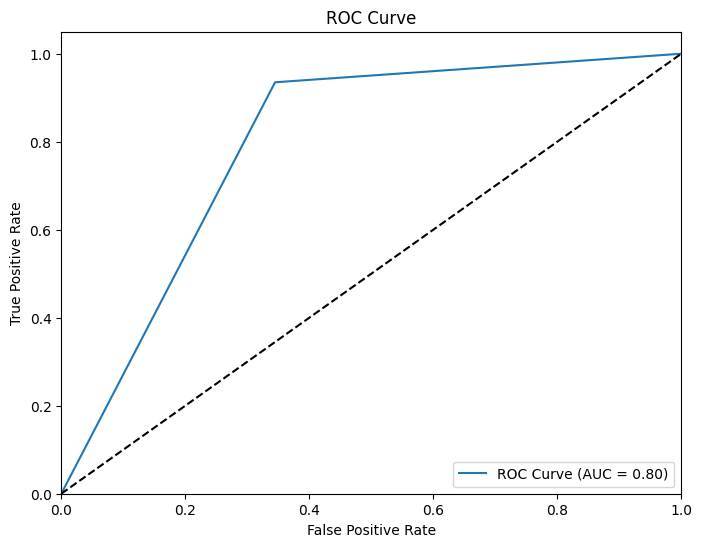

RandomForestClassifier(criterion='entropy', max_depth=4)
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      7485
           1       0.78      0.90      0.83      7347

    accuracy                           0.82     14832
   macro avg       0.83      0.82      0.82     14832
weighted avg       0.83      0.82      0.82     14832



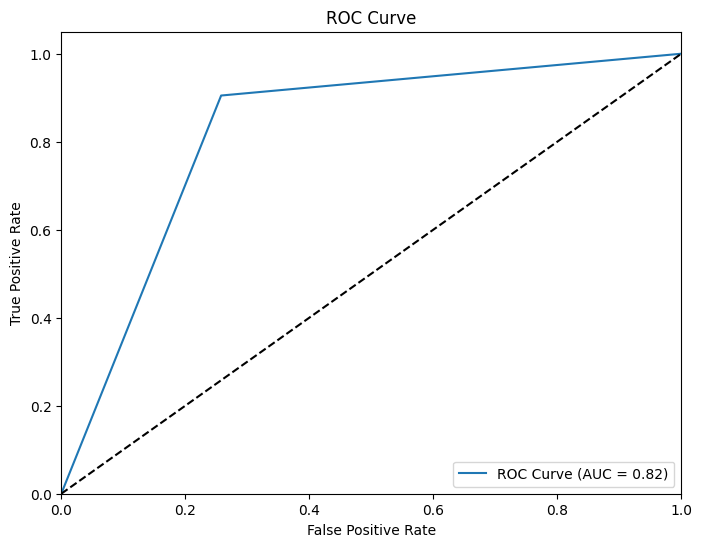

AdaBoostClassifier(random_state=1)
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      7485
           1       0.84      0.87      0.86      7347

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832



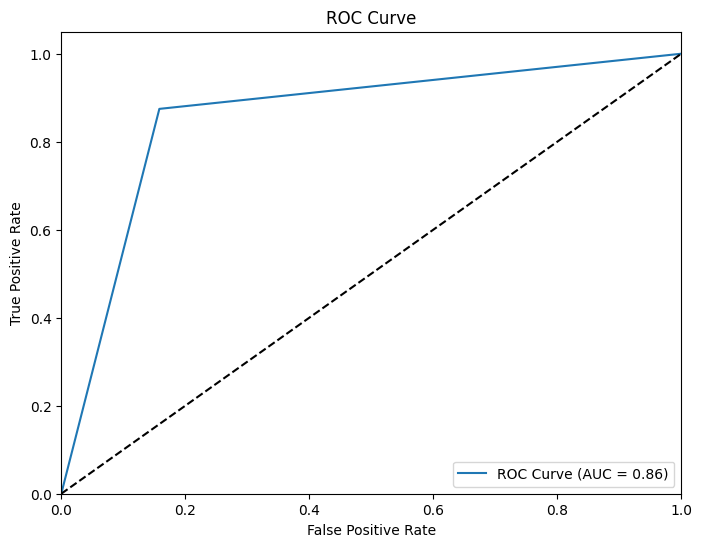

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      7485
           1       0.91      0.89      0.90      7347

    accuracy                           0.90     14832
   macro avg       0.90    

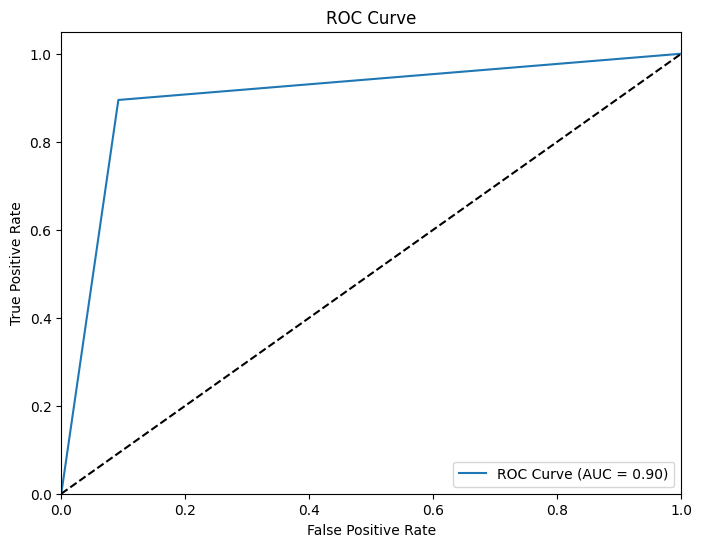

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
lr=LogisticRegression(random_state=1)
sv=SVC()
nb=GaussianNB()
clf=DecisionTreeClassifier(random_state=5,criterion='entropy',max_depth=4)
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=4)
ad=AdaBoostClassifier(random_state=1)
xgb=XGBClassifier(random_state=1)
models=[knn,lr,sv,nb,clf,rf,ad,xgb]
for model in models:
   print(model)
   model.fit(X_train_os,y_train_os)
   y_pred_os=model.predict(X_test_os)
   print(classification_report(y_test_os,y_pred_os))
   fpr, tpr, _ = roc_curve(y_test_os, y_pred_os)
   roc_auc = roc_auc_score(y_test_os, y_pred_os)
  #  Plot ROC curve
   plt.figure(figsize=(8, 6))
   plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
   plt.plot([0, 1], [0, 1], 'k--')
   plt.xlim([0.0, 1.0])
   plt.ylim([0.0, 1.05])
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title('ROC Curve')
   plt.legend(loc='lower right')
   plt.show()

accuracy 90 at xgb

undersampling

In [ ]:
# undersampling
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(random_state=1)
X_us,y_us=us.fit_resample(X,y)

In [ ]:
X_us

,age,education.num,marital.status,relationship,sex,capital.gain,capital.loss,hours.per.week
0,44,9,2,5,0,0,0,60
1,51,9,2,0,1,0,0,40
2,24,9,2,0,1,0,0,50
3,55,9,2,5,0,0,0,40
4,76,9,6,1,1,0,0,6
...,...,...,...,...,...,...,...,...
15677,34,13,4,1,0,0,0,55
15678,71,16,2,0,1,0,0,10
15679,39,12,2,5,0,0,0,20
15680,53,14,2,0,1,0,0,40


In [ ]:
y_us

0        0
1        0
2        0
3        0
4        0
        ..
15677    1
15678    1
15679    1
15680    1
15681    1
Name: income, Length: 15682, dtype: int64

In [ ]:
y_us.value_counts()

0    7841
1    7841
Name: income, dtype: int64

In [ ]:
X_us_scaled=mms.fit_transform(X_us)
X_us_scaled

array([[0.36986301, 0.53333333, 0.33333333, ..., 0.        , 0.        ,
        0.60204082],
       [0.46575342, 0.53333333, 0.33333333, ..., 0.        , 0.        ,
        0.39795918],
       [0.09589041, 0.53333333, 0.33333333, ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.30136986, 0.73333333, 0.33333333, ..., 0.        , 0.        ,
        0.19387755],
       [0.49315068, 0.86666667, 0.33333333, ..., 0.        , 0.        ,
        0.39795918],
       [0.31506849, 0.53333333, 0.33333333, ..., 0.        , 0.        ,
        0.39795918]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_us_scaled,y_us,random_state=1,test_size=0.3)

KNeighborsClassifier(n_neighbors=7)
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2368
           1       0.79      0.81      0.80      2337

    accuracy                           0.80      4705
   macro avg       0.80      0.80      0.80      4705
weighted avg       0.80      0.80      0.80      4705



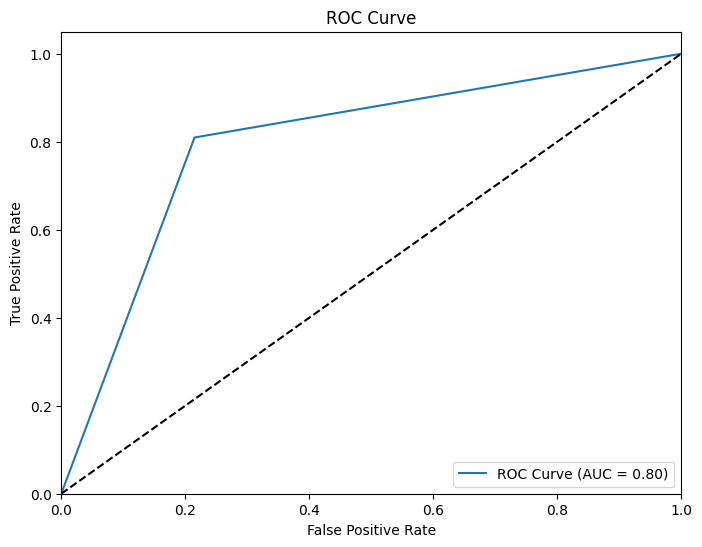

LogisticRegression(random_state=1)
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2368
           1       0.76      0.78      0.77      2337

    accuracy                           0.77      4705
   macro avg       0.77      0.77      0.77      4705
weighted avg       0.77      0.77      0.77      4705



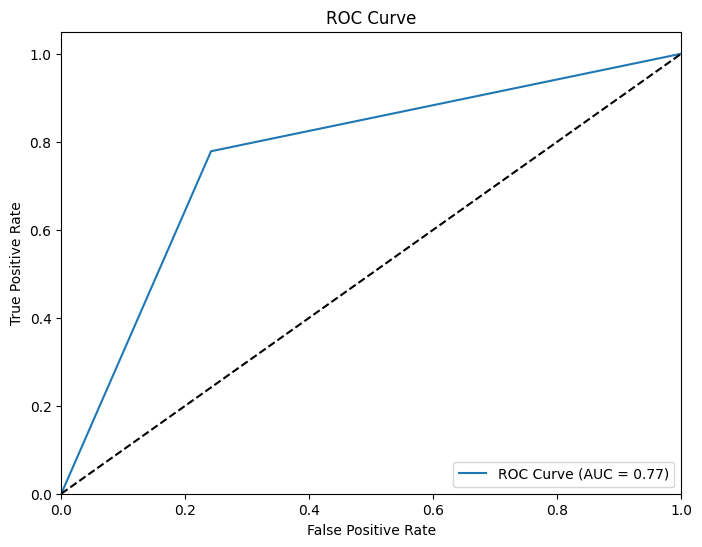

SVC()
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      2368
           1       0.78      0.87      0.82      2337

    accuracy                           0.81      4705
   macro avg       0.81      0.81      0.81      4705
weighted avg       0.81      0.81      0.81      4705



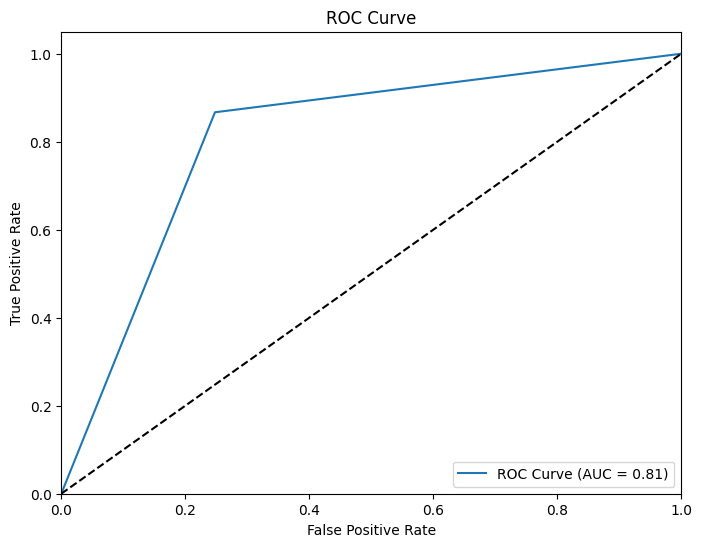

GaussianNB()
              precision    recall  f1-score   support

           0       0.62      0.94      0.75      2368
           1       0.88      0.42      0.56      2337

    accuracy                           0.68      4705
   macro avg       0.75      0.68      0.66      4705
weighted avg       0.75      0.68      0.66      4705



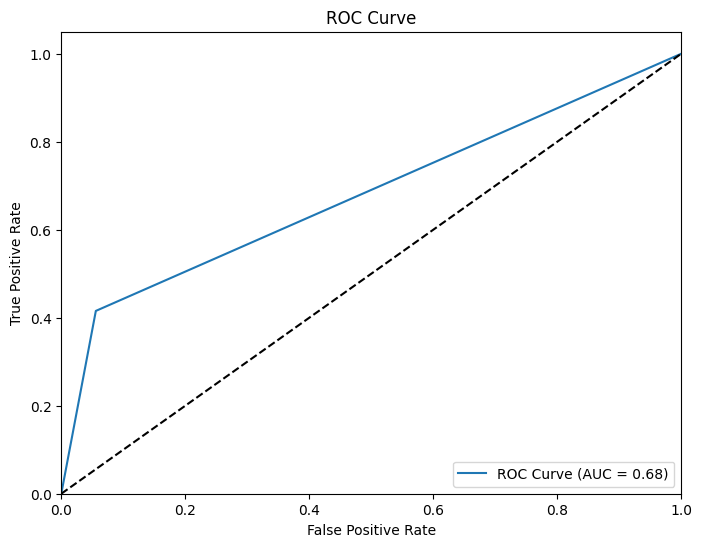

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=5)
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      2368
           1       0.76      0.86      0.81      2337

    accuracy                           0.79      4705
   macro avg       0.80      0.79      0.79      4705
weighted avg       0.80      0.79      0.79      4705



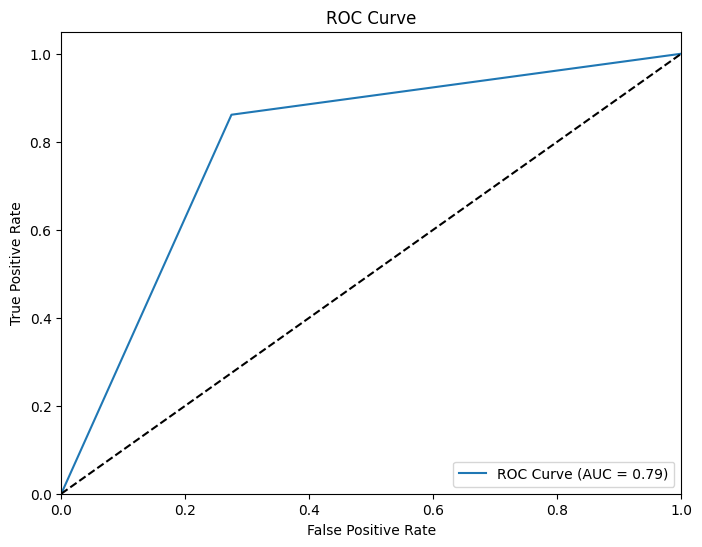

RandomForestClassifier(criterion='entropy', max_depth=4)
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      2368
           1       0.74      0.88      0.81      2337

    accuracy                           0.79      4705
   macro avg       0.80      0.79      0.79      4705
weighted avg       0.80      0.79      0.79      4705



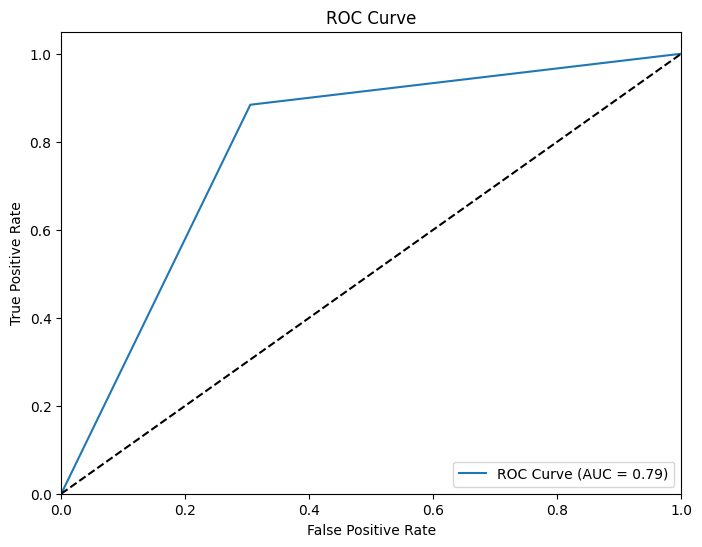

AdaBoostClassifier(random_state=1)
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2368
           1       0.80      0.84      0.82      2337

    accuracy                           0.82      4705
   macro avg       0.82      0.82      0.82      4705
weighted avg       0.82      0.82      0.82      4705



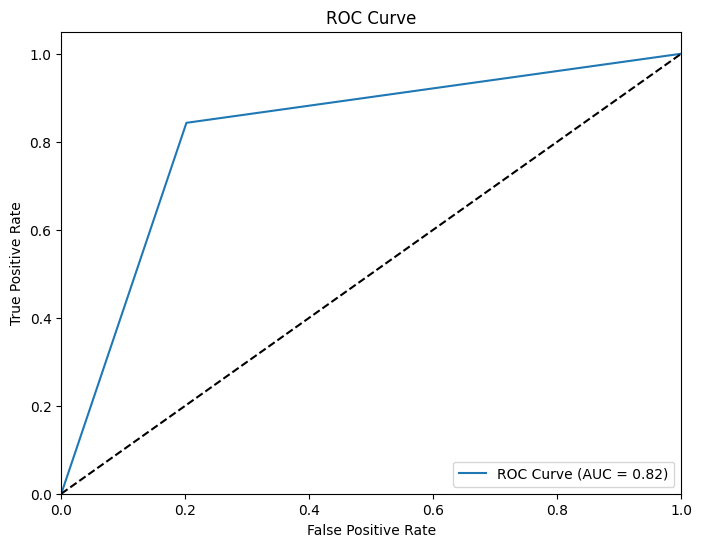

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      2368
           1       0.80      0.87      0.83      2337

    accuracy                           0.83      4705
   macro avg       0.83    

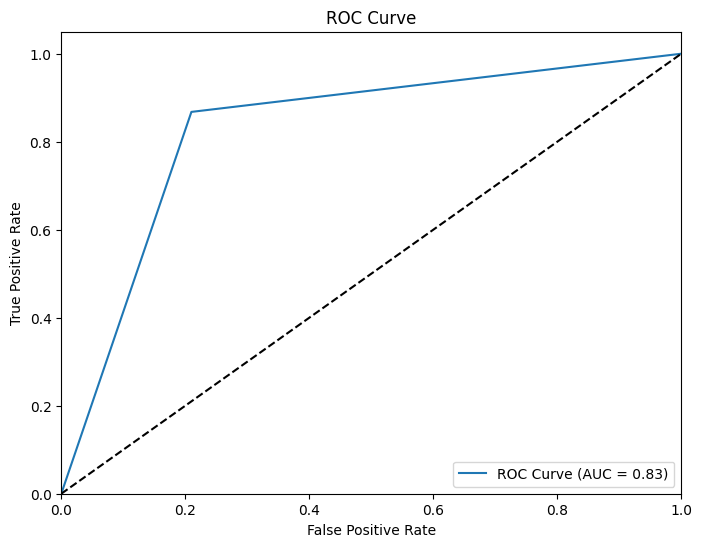

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
lr=LogisticRegression(random_state=1)
sv=SVC()
nb=GaussianNB()
clf=DecisionTreeClassifier(random_state=5,criterion='entropy',max_depth=4)
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=4)
ad=AdaBoostClassifier(random_state=1)
xgb=XGBClassifier(random_state=1)
models=[knn,lr,sv,nb,clf,rf,ad,xgb]
for model in models:
   print(model)
   model.fit(X_train,y_train)
   y_pred=model.predict(X_test)
   print(classification_report(y_test,y_pred))
   fpr, tpr, _ = roc_curve(y_test, y_pred)
   roc_auc = roc_auc_score(y_test, y_pred)
  #  Plot ROC curve
   plt.figure(figsize=(8, 6))
   plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
   plt.plot([0, 1], [0, 1], 'k--')
   plt.xlim([0.0, 1.0])
   plt.ylim([0.0, 1.05])
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title('ROC Curve')
   plt.legend(loc='lower right')
   plt.show()

highest accuracy 83 xgb

# **HYPER PARAMETER TUNING USING GRIDSEARCHCV**

Optimizing model parameters to improve performance.

KNN

In [ ]:

params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],
        'algorithm':['auto','ball_tree','kd_tree','brute']}
grid=GridSearchCV(knn,params,cv=10,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(grid.best_params_)

{'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'uniform'}


              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2368
           1       0.78      0.79      0.78      2337

    accuracy                           0.79      4705
   macro avg       0.79      0.79      0.79      4705
weighted avg       0.79      0.79      0.79      4705



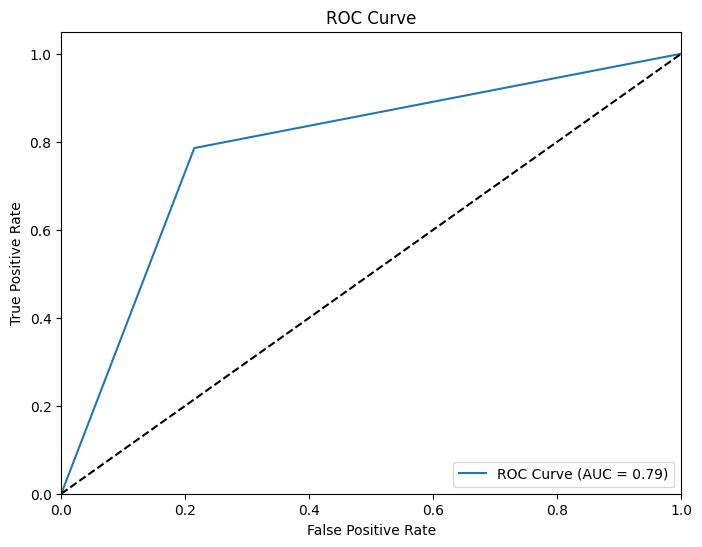

In [ ]:
knn1=KNeighborsClassifier(n_neighbors=7,algorithm='auto',weights='distance')
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)
print(classification_report(y_test,y_pred1))
fpr, tpr, _ = roc_curve(y_test, y_pred1)
roc_auc = roc_auc_score(y_test, y_pred1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Logistic regression

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']}

In [ ]:
grid = GridSearchCV(estimator=lr,param_grid=param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
print(grid.best_params_)

{'C': 100, 'solver': 'liblinear'}


              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2368
           1       0.76      0.78      0.77      2337

    accuracy                           0.77      4705
   macro avg       0.77      0.77      0.77      4705
weighted avg       0.77      0.77      0.77      4705



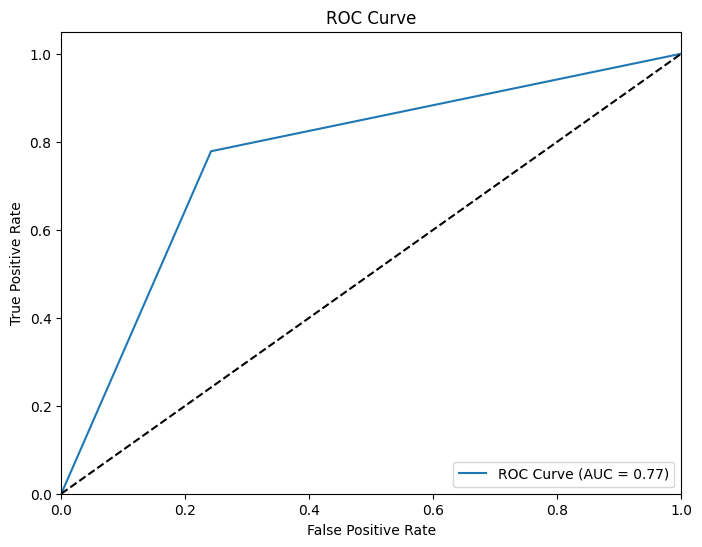

In [ ]:
lr1=LogisticRegression(C=1,solver='saga')
lr1.fit(X_train,y_train)
y_pred_lr=lr1.predict(X_test)
print(classification_report(y_test,y_pred_lr))
fpr, tpr, _ = roc_curve(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

SVC

In [ ]:
param_grid = {
     'kernel': ('linear', 'rbf','poly'),
      'C': [1, 10, 100]}


In [ ]:
grid = GridSearchCV(estimator=sv,param_grid=param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100],
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='accuracy')

In [ ]:
print(grid.best_params_)

{'C': 100, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.85      0.76      0.80      2368
           1       0.78      0.87      0.82      2337

    accuracy                           0.81      4705
   macro avg       0.82      0.81      0.81      4705
weighted avg       0.82      0.81      0.81      4705



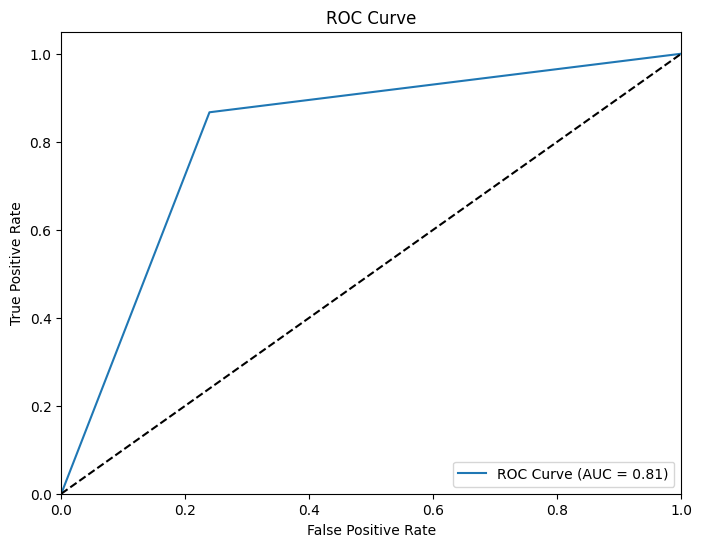

In [ ]:
sv1=SVC(C=10,kernel='rbf')
sv1.fit(X_train,y_train)
y_pred_sv=sv1.predict(X_test)
print(classification_report(y_test,y_pred_sv))
fpr, tpr, _ = roc_curve(y_test, y_pred_sv)
roc_auc = roc_auc_score(y_test, y_pred_sv)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Naive bayes

In [ ]:


param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [ ]:
grid = GridSearchCV(estimator=nb,param_grid=param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [ ]:
print(grid.best_params_)

{'var_smoothing': 1e-05}


              precision    recall  f1-score   support

           0       0.62      0.94      0.75      2368
           1       0.88      0.42      0.57      2337

    accuracy                           0.68      4705
   macro avg       0.75      0.68      0.66      4705
weighted avg       0.75      0.68      0.66      4705



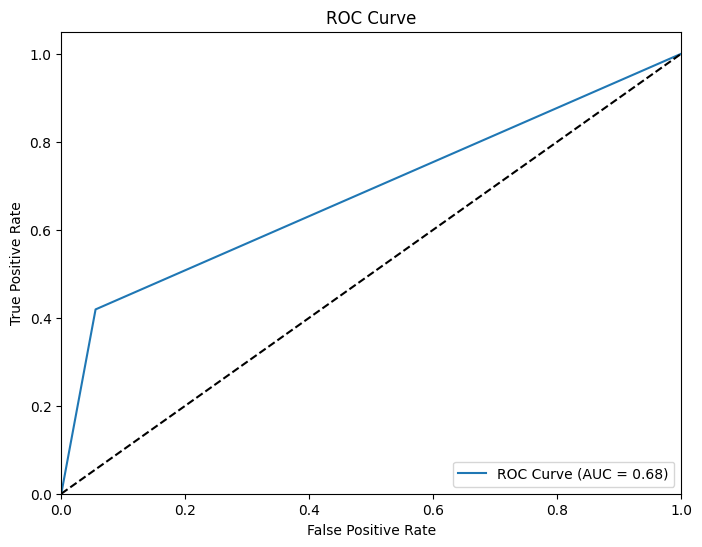

In [ ]:
nb1=GaussianNB(var_smoothing=1e-05)
nb1.fit(X_train,y_train)
y_pred_nb=nb1.predict(X_test)
print(classification_report(y_test,y_pred_nb))
fpr, tpr, _ = roc_curve(y_test, y_pred_nb)
roc_auc = roc_auc_score(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

decision tree

In [ ]:

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
grid = GridSearchCV(estimator=clf,param_grid=param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                              random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}


              precision    recall  f1-score   support

           0       0.82      0.77      0.79      2368
           1       0.78      0.82      0.80      2337

    accuracy                           0.80      4705
   macro avg       0.80      0.80      0.80      4705
weighted avg       0.80      0.80      0.80      4705



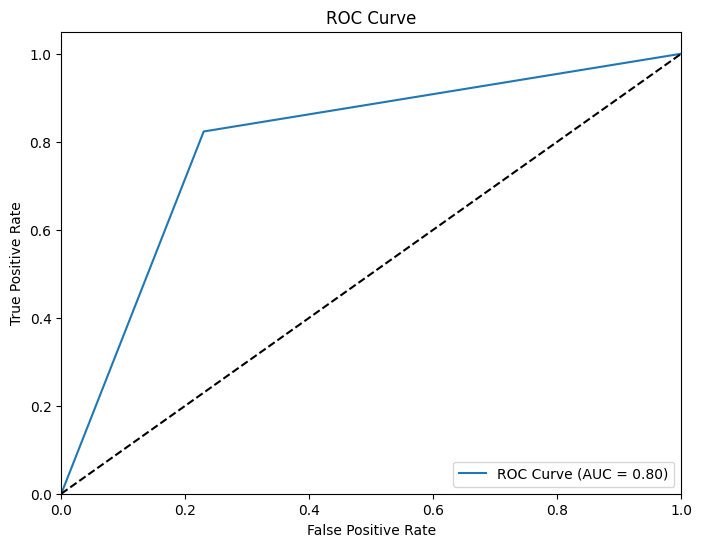

In [ ]:
clf1=DecisionTreeClassifier(criterion='entropy',max_depth= 10,max_features='auto',min_samples_leaf= 4,min_samples_split= 2)
clf1.fit(X_train,y_train)
y_pred_clf=clf1.predict(X_test)
print(classification_report(y_test,y_pred_clf))
fpr, tpr, _ = roc_curve(y_test, y_pred_clf)
roc_auc = roc_auc_score(y_test, y_pred_clf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Random forest

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [ ]:
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train,y_train)




GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=4),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:

print(grid.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2368
           1       0.79      0.85      0.82      2337

    accuracy                           0.82      4705
   macro avg       0.82      0.82      0.82      4705
weighted avg       0.82      0.82      0.82      4705



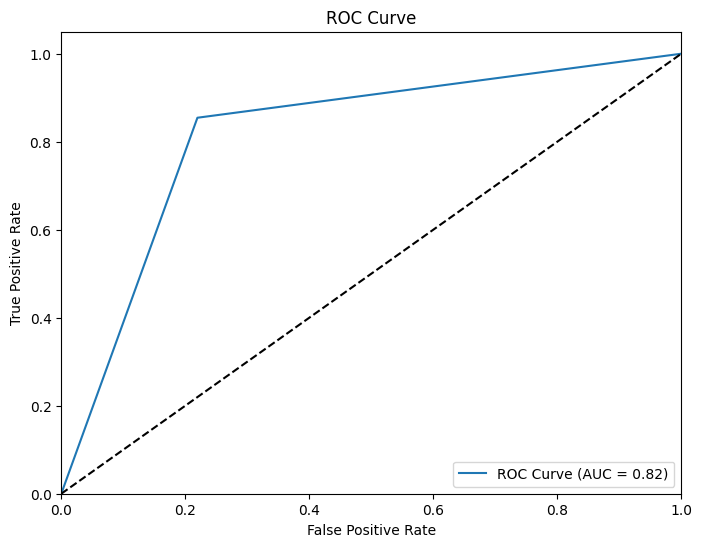

In [ ]:
rf1=RandomForestClassifier(max_depth= 20, min_samples_leaf=1, min_samples_split=10, n_estimators= 200)
rf1.fit(X_train,y_train)
y_pred_rf=rf1.predict(X_test)
print(classification_report(y_test,y_pred_rf))
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Ada boost

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

In [ ]:
grid= GridSearchCV(estimator=ad, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
print(grid.best_params_)

{'learning_rate': 1.0, 'n_estimators': 200}


              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2368
           1       0.81      0.85      0.83      2337

    accuracy                           0.83      4705
   macro avg       0.83      0.83      0.83      4705
weighted avg       0.83      0.83      0.83      4705



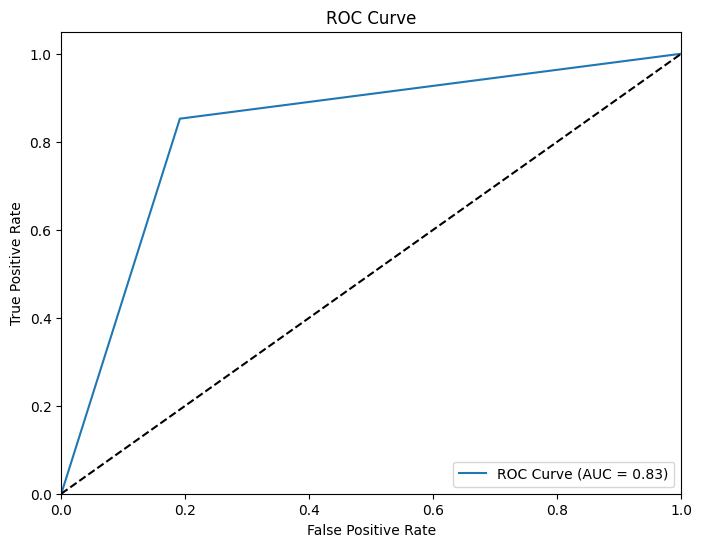

In [ ]:
ad1=AdaBoostClassifier(learning_rate=1.0,n_estimators=200)
ad1.fit(X_train,y_train)
y_pred_ad=ad1.predict(X_test)
print(classification_report(y_test,y_pred_ad))
fpr, tpr, _ = roc_curve(y_test, y_pred_ad)
roc_auc = roc_auc_score(y_test, y_pred_ad)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

 xgboost

In [ ]:

param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    # 'gamma': [0, 0.1, 0.2],
    # 'subsample': [0.6, 0.8, 1.0],
    # 'colsample_bytree': [0.6, 0.8, 1.0],
}

In [ ]:
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
print(grid.best_params_)

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2368
           1       0.81      0.87      0.84      2337

    accuracy                           0.83      4705
   macro avg       0.84      0.83      0.83      4705
weighted avg       0.84      0.83      0.83      4705



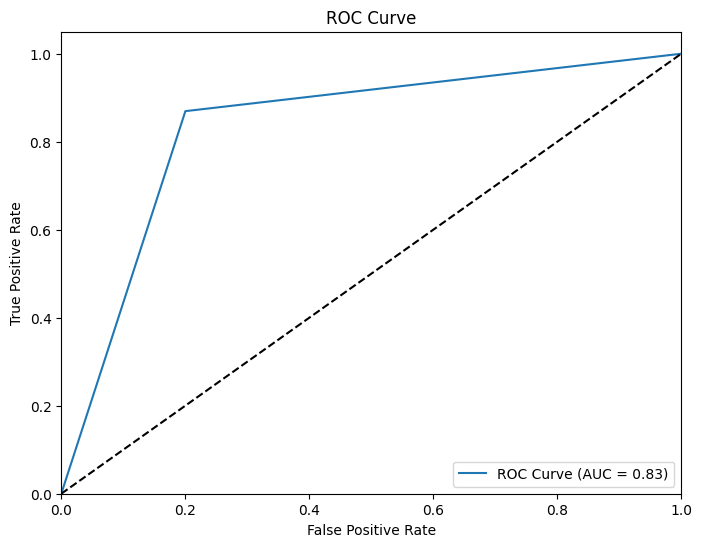

In [ ]:
xgb1=XGBClassifier(colsample_bytree=0.6,gamma=0, learning_rate= 0.1, max_depth= 6, n_estimators=200, subsample= 1.0)
xgb1.fit(X_train,y_train)
y_pred_xgb=xgb1.predict(X_test)
print(classification_report(y_test,y_pred_xgb))
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

hihest accuracy xgboost with 83

# DEPLOY

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      7485
           1       0.91      0.89      0.90      7347

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832



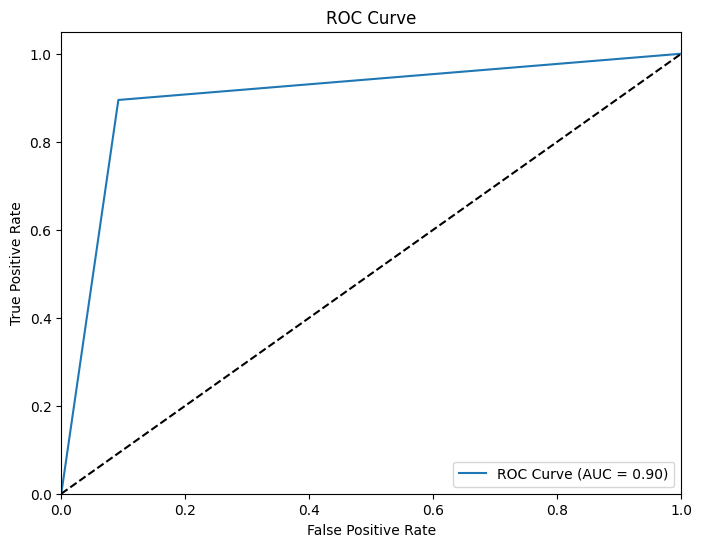

In [ ]:
xgb=XGBClassifier(random_state=1)
xgb.fit(X_train_os,y_train_os)
y_pred_os=xgb.predict(X_test_os)
print(classification_report(y_test_os,y_pred_os))
fpr, tpr, _ = roc_curve(y_test_os, y_pred_os)
roc_auc = roc_auc_score(y_test_os, y_pred_os)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
pickle.dump(xgb,open('model3.sav','wb'))
pickle.dump(mms,open('scaler4.sav','wb'))